In [6]:
#general functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("network_backup_dataset.csv")
X = data.iloc[:, [0, 1, 2, 3, 4]].values
X_SEnc = data.iloc[:, [0, 1, 2, 3, 4]].values
#X_OHEnc = data.iloc[:, [0, 1, 2, 3, 4]].values
def getScalarEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    #print enc.classes_
    return new_cat_features # [1 2 0]
def getOHEncoding(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    new_cat_features = enc.transform(cat_features)
    print new_cat_features # [1 2 0]
    new_cat_features = new_cat_features.reshape(-1, 1) # Needs to be the correct shape
    ohe = preprocessing.OneHotEncoder(sparse=False) #Easier to read
    ohe_features=ohe.fit_transform(new_cat_features)
    return  ohe_features
def rmsefun(actual,predicted):
    return np.sqrt(mean_squared_error(actual,predicted))
def plot_val(A,B,Alabel,Blabel,plttitle):
    plt.scatter(x=A, y=B,s=1)
    plt.plot([A.min(), A.max()], [A.min(), A.max()],  'k--', lw=5)
    plt.xlabel(Alabel)
    plt.ylabel(Blabel)
    plt.savefig('plots/'+plttitle, format='png')
    plt.show()
reg = linear_model.LinearRegression()

for i in range(0,5,1):
    X_SEnc[:,i]=getScalarEncoding(X[:, i])

    
    
#l is list for generating all possible combinations, and then will be used for fitting model on these combinations
from itertools import product
l=list(product([False,True], repeat=5))

kf = KFold(n_splits = 10)
y=data.iloc[:,5].values
reg = linear_model.LinearRegression()

[(False, False, False, False, False), (False, False, False, False, True), (False, False, False, True, False), (False, False, False, True, True), (False, False, True, False, False), (False, False, True, False, True), (False, False, True, True, False), (False, False, True, True, True), (False, True, False, False, False), (False, True, False, False, True), (False, True, False, True, False), (False, True, False, True, True), (False, True, True, False, False), (False, True, True, False, True), (False, True, True, True, False), (False, True, True, True, True), (True, False, False, False, False), (True, False, False, False, True), (True, False, False, True, False), (True, False, False, True, True), (True, False, True, False, False), (True, False, True, False, True), (True, False, True, True, False), (True, False, True, True, True), (True, True, False, False, False), (True, True, False, False, True), (True, True, False, True, False), (True, True, False, True, True), (True, True, True, False, F

for fold : 1
Train RMSE0.10452383895
Test RMSE0.1015432411
for fold : 2
Train RMSE0.0990271014668
Test RMSE0.102153212372
for fold : 3
Train RMSE0.104578934651
Test RMSE0.101536187634
for fold : 4
Train RMSE0.0991424965871
Test RMSE0.102140500373
for fold : 5
Train RMSE0.104865475986
Test RMSE0.101503138732
for fold : 6
Train RMSE0.0992714183243
Test RMSE0.102126576404
for fold : 7
Train RMSE0.104756046745
Test RMSE0.101515883448
for fold : 8
Train RMSE0.0992823837816
Test RMSE0.102125731027
for fold : 9
Train RMSE0.104779734225
Test RMSE0.1015138104
for fold : 10
Train RMSE0.0987811862269
Test RMSE0.102180522885
Average Train RMSE across 10 folds:0.101833880437
Average Test RMSE across 10 folds:0.101900861694
Predicted results :
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals :
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


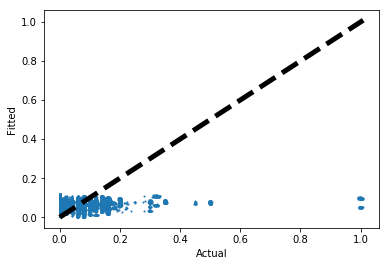

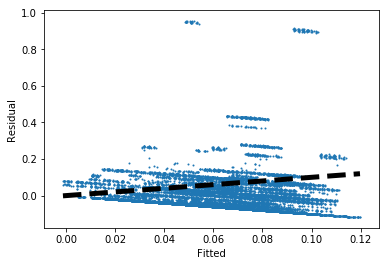

In [7]:
#Task 2.a.1 Basic linear Regression, on 10 FCV, plot Train RMSE and Test RMSE

rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
count=1
for train_index, test_index in kf.split(X_SEnc):
    print "for fold : "+str(count)
    X_train, y_train = X_SEnc[train_index], y[train_index]
    X_test, y_test = X_SEnc[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=np.sqrt(np.mean((y_test - y_test_predicted) ** 2))
    test_curr =np.sqrt(np.mean((y_train - y_train_predicted) ** 2))
    print "Train RMSE" +str(train_curr)
    print "Test RMSE" +str(test_curr)
    rmse_test.append(train_curr)
    rmse_train.append(test_curr)
    count=count+1
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual

plt.scatter(x=y, y=y_predicted,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.savefig('plots/2ai_ActualvsFitted.png', format='png')

plt.show()

#Residual
y_residual = y - y_predicted


plt.scatter(x=y_predicted,y= y_residual,s=1)
plt.plot([y_predicted.min(), y_predicted.max()], [y_predicted.min(), y_predicted.max()],  'k--', lw=5)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.savefig('plots/2ai_FittedvsResidual.png', format='png')

plt.show()




C:\Users\ektam\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


for fold : 1
Train RMSE0.10452383895
Test RMSE0.1015432411
for fold : 2
Train RMSE0.0990271014668
Test RMSE0.102153212372
for fold : 3
Train RMSE0.104578934651
Test RMSE0.101536187634
for fold : 4
Train RMSE0.0991424965871
Test RMSE0.102140500373
for fold : 5
Train RMSE0.104865475986
Test RMSE0.101503138732
for fold : 6
Train RMSE0.0992714183243
Test RMSE0.102126576404
for fold : 7
Train RMSE0.104756046745
Test RMSE0.101515883448
for fold : 8
Train RMSE0.0992823837816
Test RMSE0.102125731027
for fold : 9
Train RMSE0.104779734225
Test RMSE0.1015138104
for fold : 10
Train RMSE0.0987811862269
Test RMSE0.102180522885
Average Train RMSE across 10 folds:0.101833880437
Average Test RMSE across 10 folds:0.101900861694
Predicted results :
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals :
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


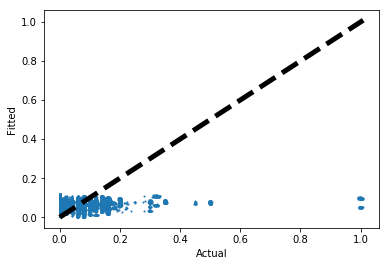

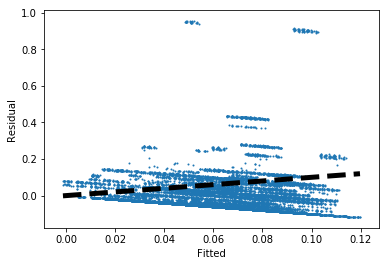

In [16]:
# 2.a.ii Standardize
#X_Scalar = data.iloc[:, [0, 1, 2, 3, 4]].values

#Standardize features by removing the mean and scaling to unit variance
from sklearn import preprocessing #import StandardScaler
x_std=preprocessing.StandardScaler(with_mean=False).fit_transform(X_SEnc)
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]

count=1
for train_index, test_index in kf.split(x_std):
    print "for fold : "+str(count)
    X_train, y_train = x_std[train_index], y[train_index]
    X_test, y_test = x_std[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=np.sqrt(np.mean((y_test - y_test_predicted) ** 2))
    test_curr =np.sqrt(np.mean((y_train - y_train_predicted) ** 2))
    print "Train RMSE" +str(train_curr)
    print "Test RMSE" +str(test_curr)
    rmse_test.append(train_curr)
    rmse_train.append(test_curr)
    count=count+1
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual

plt.scatter(x=y, y=y_predicted,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.savefig('plots/2aii_ActualvsFitted.png', format='png')

plt.show()

#Residual
y_residual = y - y_predicted


plt.scatter(x=y_predicted,y= y_residual,s=1)
plt.plot([y_predicted.min(), y_predicted.max()], [y_predicted.min(), y_predicted.max()],  'k--', lw=5)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.savefig('plots/2aii_FittedvsResidual.png', format='png')

plt.show()


In [17]:
#Task 2 a iii, applying f regression, find 3 most important features

from sklearn import feature_selection
model = feature_selection.SelectKBest(score_func=feature_selection.f_regression,k=3)
results=model.fit(x_std,y)
print results.scores_


[  8.45006257e-03   2.20612122e+02   1.50740934e+02   2.61386654e+01
   4.60786474e+02]


In [18]:
print sorted(results.scores_)

[0.008450062567778558, 26.138665427592517, 150.74093436955826, 220.61212209783977, 460.7864739779813]


In [15]:

"""
As per the output of f_regression, the three features are feature 5, 2, 3
i.e. FileName , Day Of the Week, Backup Start Time-Hour of the day
"""

'\nAs per the output of f_regression, the three features are feature 5, 2, 3\ni.e. FileName , Day Of the Week, Backup Start Time-Hour of the day\n'

In [19]:
#Task 2 a iii, we now apply mutual_info_regression to get the 3 best features
mi_model = feature_selection.SelectKBest(score_func=feature_selection.mutual_info_regression,k=3)
mi_results=mi_model.fit(x_std,y)
print mi_results.scores_
print "Sorted results"
print sorted(mi_results.scores_)

[ 0.00131441  0.24216546  0.30625232  0.77195909  0.77235615]
Sorted results
[0.0013144122079680187, 0.24216545529366718, 0.30625231543666276, 0.77195908562492388, 0.77235615386767975]


In [18]:
"""According to the output obtained by mutial info regression, the 3 best features are : 4,5,3
i.e. Work-Flow-ID, FileName,Backup Start Time-Hour of the day"""

'\nAccording to the output obtained by mutial info regression, the 3 best features are : 4,5,3\ni.e. Work-Flow-ID, FileName,Backup Start Time-Hour of the day\n'

kf fold starts
Train RMSE : 0.101606101855
Test RMSE : 0.10425328388
kf fold starts
Train RMSE : 0.102168176432
Test RMSE : 0.0991886365351
kf fold starts
Train RMSE : 0.101596149598
Test RMSE : 0.104343027355
kf fold starts
Train RMSE : 0.102155251902
Test RMSE : 0.0993092462799
kf fold starts
Train RMSE : 0.101563198689
Test RMSE : 0.104630075898
kf fold starts
Train RMSE : 0.102140683361
Test RMSE : 0.0994419953824
kf fold starts
Train RMSE : 0.101575244249
Test RMSE : 0.104527424556
kf fold starts
Train RMSE : 0.102139871186
Test RMSE : 0.0994507289295
kf fold starts
Train RMSE : 0.10157474839
Test RMSE : 0.104530431175
kf fold starts
Train RMSE : 0.102196221087
Test RMSE : 0.0989271113992
Average Train RMSE across 10 folds:0.101860196139
Average Test RMSE across 10 folds:0.101871564675
Predicted results :
[ 0.03148296  0.03895785  0.04082658 ...,  0.08376495  0.08187429
  0.07998363]
Residuals :
[-0.03148296 -0.03895785 -0.04082658 ...,  0.11480748  0.11769578
  0.12121689]


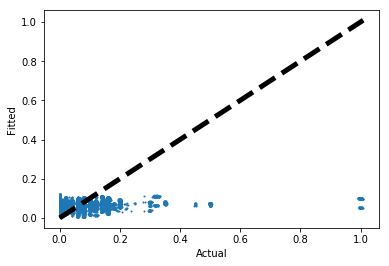

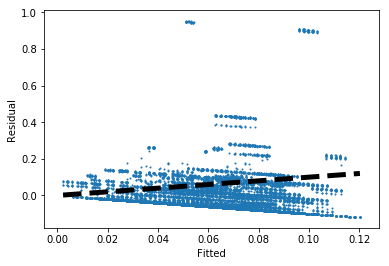

In [20]:
# Now training the model as per top three features from f_regression

idx_IN_columns = [4,1,2 ]
x_std_trim_fr = x_std[:,idx_IN_columns]

count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
for train_index, test_index in kf.split(x_std_trim_fr):
    print "kf fold starts"
    X_train, y_train = x_std_trim_fr[train_index], y[train_index]
    X_test, y_test = x_std_trim_fr[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=np.sqrt(np.mean((y_train - y_train_predicted) ** 2))
    test_curr=np.sqrt(np.mean((y_test - y_test_predicted) ** 2))
    print "Train RMSE : " +str(train_curr)
    print "Test RMSE : " +str(test_curr)
    rmse_test.append(train_curr)
    rmse_train.append(test_curr)
    count=count+1
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual

plt.scatter(x=y, y=y_predicted,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.savefig('plots/2aiii_ActualvsFitted_fr.png', format='png')

plt.show()

#Residual
y_residual = y - y_predicted


plt.scatter(x=y_predicted,y= y_residual,s=1)
plt.plot([y_predicted.min(), y_predicted.max()], [y_predicted.min(), y_predicted.max()],  'k--', lw=5)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.savefig('plots/2aiii_FittedvsResidual_fr.png', format='png')

plt.show()


kf fold starts
Train RMSE : 0.102135228001
Test RMSE : 0.105476942351
kf fold starts
Train RMSE : 0.102830211353
Test RMSE : 0.0992054977667
kf fold starts
Train RMSE : 0.102116219931
Test RMSE : 0.105632583938
kf fold starts
Train RMSE : 0.102817710488
Test RMSE : 0.099321764701
kf fold starts
Train RMSE : 0.102089460546
Test RMSE : 0.105866412905
kf fold starts
Train RMSE : 0.102802434154
Test RMSE : 0.0994673606974
kf fold starts
Train RMSE : 0.102092838725
Test RMSE : 0.10583528367
kf fold starts
Train RMSE : 0.102805604585
Test RMSE : 0.0994382833083
kf fold starts
Train RMSE : 0.102099502765
Test RMSE : 0.105783045789
kf fold starts
Train RMSE : 0.102858642182
Test RMSE : 0.0989378739138
Average Train RMSE across 10 folds:0.102496504904
Average Test RMSE across 10 folds:0.102464785273
Predicted results :
[ 0.01633276  0.02863316  0.03047253 ...,  0.08569239  0.08381445
  0.0819365 ]
Residuals :
[-0.01633276 -0.02863316 -0.03047253 ...,  0.11288004  0.11575563
  0.11926402]


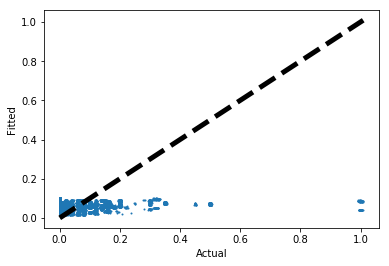

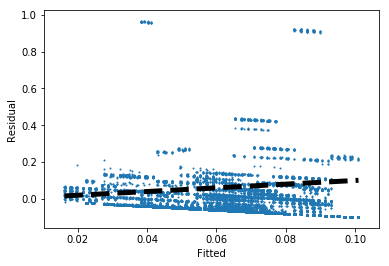

In [23]:
# Now training the model as per top three features from mutual_info_regression
#best features 4,5,3
idx_IN_columns = [3,4,2 ]
x_std_trim_fr = x_std[:,idx_IN_columns]

count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
for train_index, test_index in kf.split(x_std_trim_fr):
    print "kf fold starts"
    X_train, y_train = x_std_trim_fr[train_index], y[train_index]
    X_test, y_test = x_std_trim_fr[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    train_curr=np.sqrt(np.mean((y_train - y_train_predicted) ** 2))
    test_curr=np.sqrt(np.mean((y_test - y_test_predicted) ** 2))
    print "Train RMSE : " +str(train_curr)
    print "Test RMSE : " +str(test_curr)
    rmse_test.append(train_curr)
    rmse_train.append(test_curr)
    count=count+1
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10

print "Average Train RMSE across 10 folds:"+ str(average_train_RMSE)
print "Average Test RMSE across 10 folds:"+ str(average_test_RMSE)

y_predicted=np.concatenate(y_predicted_fold, axis=0)
print "Predicted results :"
print y_predicted
y_residual = y - y_predicted
print "Residuals :"
print y_residual

plt.scatter(x=y, y=y_predicted,s=1)
plt.plot([y.min(), y.max()], [y.min(), y.max()],  'k--', lw=5)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.savefig('plots/2aiii_ActualvsFitted_mr.png', format='png')

plt.show()

#Residual
y_residual = y - y_predicted


plt.scatter(x=y_predicted,y= y_residual,s=1)
plt.plot([y_predicted.min(), y_predicted.max()], [y_predicted.min(), y_predicted.max()],  'k--', lw=5)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.savefig('plots/2aiii_FittedvsResidual_mr.png', format='png')

plt.show()


In [5]:
#Task 2aiv generating all possible combinations, and then fitting the model for these combinations

from itertools import product
l=list(product([False,True], repeat=5))
l

[(False, False, False, False, False),
 (False, False, False, False, True),
 (False, False, False, True, False),
 (False, False, False, True, True),
 (False, False, True, False, False),
 (False, False, True, False, True),
 (False, False, True, True, False),
 (False, False, True, True, True),
 (False, True, False, False, False),
 (False, True, False, False, True),
 (False, True, False, True, False),
 (False, True, False, True, True),
 (False, True, True, False, False),
 (False, True, True, False, True),
 (False, True, True, True, False),
 (False, True, True, True, True),
 (True, False, False, False, False),
 (True, False, False, False, True),
 (True, False, False, True, False),
 (True, False, False, True, True),
 (True, False, True, False, False),
 (True, False, True, False, True),
 (True, False, True, True, False),
 (True, False, True, True, True),
 (True, True, False, False, False),
 (True, True, False, False, True),
 (True, True, False, True, False),
 (True, True, False, True, True),


kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101833880437
 Test RMSE : 0.101900861694
Predicted output 
[ 0.0263568   0.03874454  0.04057942 ...,  0.08704922  0.08517501
  0.0833008 ]
Residuals : 
[-0.0263568  -0.03874454 -0.04057942 ...,  0.11152321  0.11439506
  0.11789972]


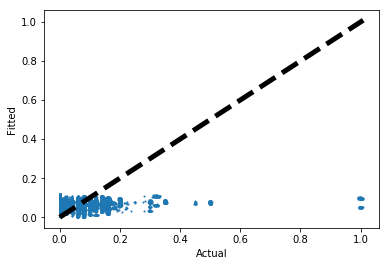

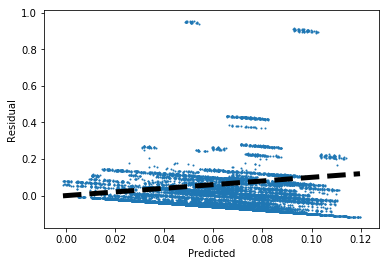

In [22]:
#For combination 1
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
rmse_train_com=[]
rmse_test_com=[]
count=1
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
ohenc = OneHotEncoder(categorical_features=(False, False, False, False, False))
ohenc.fit(X_SEnc)
xoh=ohenc.transform(X_SEnc)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    reg.fit(X_train, y_train)
    y_test_predicted = reg.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=reg.predict(X_train)
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
rmse_train_com.append(average_train_RMSE)
rmse_test_com.append(average_test_RMSE)
y_predicted=np.concatenate(y_predicted_fold, axis=0)
print "Predicted output "
print y_predicted
y_residual=y-y_predicted
print "Residuals : "
print y_residual
plot_val(y,y_predicted,'Actual','Fitted','2aiv_ActualvsFitted_'+str(count)+'.png')
plot_val(y_predicted,y_residual,'Predicted','Residual','2aiv_PredictedvsResidual_'+str(count)+'.png')
count=count+1
    


(False, False, False, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907919996
 Test RMSE : 0.0908285420594
Predicted output 
[ 0.09493256  0.01715088  0.01747131 ...,  0.14829063  0.14816284
  0.14750481]
Residuals : 
[-0.09493256 -0.01715088 -0.01747131 ...,  0.0502818   0.05140723
  0.05369571]


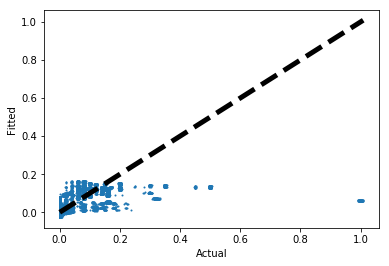

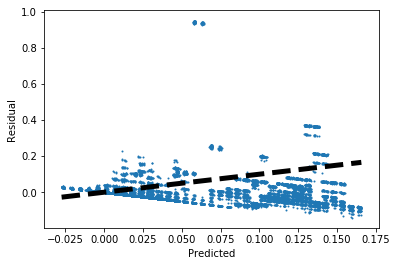

(False, False, False, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907948809896
 Test RMSE : 0.0908177312431
Predicted output 
[ 0.09527622  0.01808844  0.01809649 ...,  0.14775085  0.14778137
  0.14779663]
Residuals : 
[-0.09527622 -0.01808844 -0.01809649 ...,  0.05082158  0.0517887
  0.05340389]


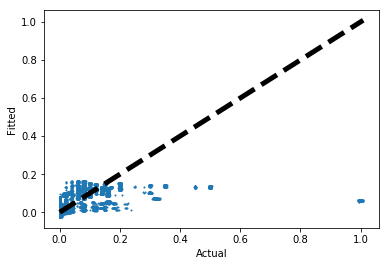

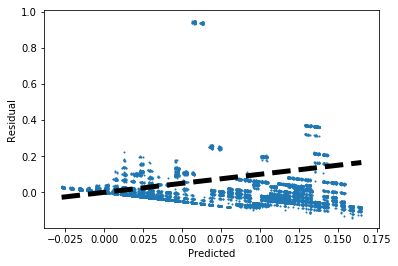

(False, False, False, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907940876913
 Test RMSE : 0.0908321391078
Predicted output 
[ 0.09453964  0.01716423  0.01753807 ...,  0.14825988  0.14812696
  0.14746058]
Residuals : 
[-0.09453964 -0.01716423 -0.01753807 ...,  0.05031256  0.05144311
  0.05373994]


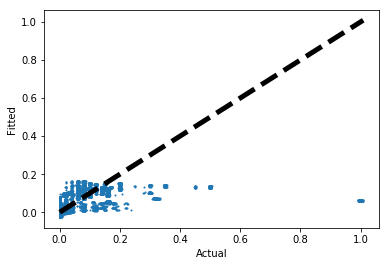

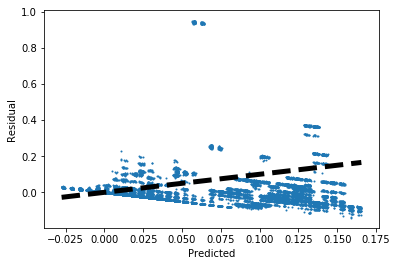

(False, False, True, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100585340344
 Test RMSE : 0.100669420831
Predicted output 
[ 0.01964349  0.03222962  0.0340587  ...,  0.07610321  0.07423782
  0.07237148]
Residuals : 
[-0.01964349 -0.03222962 -0.0340587  ...,  0.12246923  0.12533225
  0.12882904]


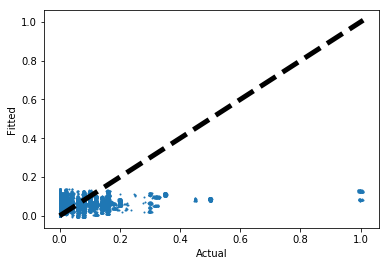

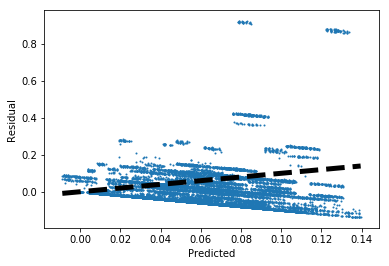

(False, False, True, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.089383543512
 Test RMSE : 0.0894377477389
Predicted output 
[ 0.08761597  0.01043701  0.01071167 ...,  0.13705444  0.13693237
  0.13626099]
Residuals : 
[-0.08761597 -0.01043701 -0.01071167 ...,  0.06151799  0.0626377
  0.06493953]


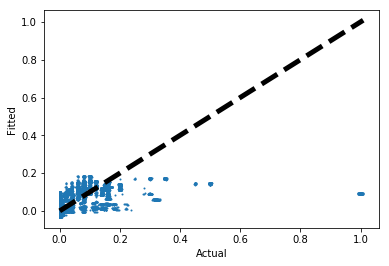

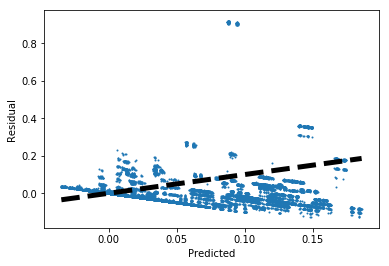

(False, False, True, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893846464106
 Test RMSE : 0.0894381554427
Predicted output 
[ 0.08882826  0.01179423  0.01180222 ...,  0.13632202  0.13630676
  0.13630676]
Residuals : 
[-0.08882826 -0.01179423 -0.01180222 ...,  0.06225041  0.06326331
  0.06489376]


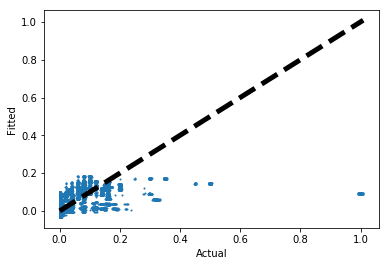

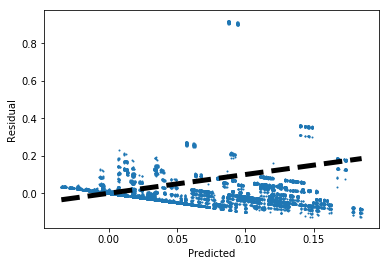

(False, False, True, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893840189812
 Test RMSE : 0.0894488695679
Predicted output 
[ 0.08808899  0.01091003  0.01145935 ...,  0.1369133   0.13677597
  0.1361084 ]
Residuals : 
[-0.08808899 -0.01091003 -0.01145935 ...,  0.06165914  0.0627941
  0.06509212]


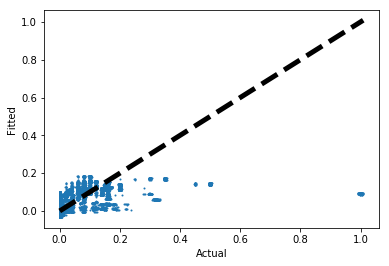

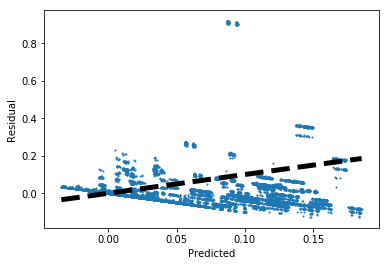

(False, True, False, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.10088955025
 Test RMSE : 0.10093820651
Predicted output 
[ 0.05763245  0.0699234   0.07176208 ...,  0.08705139  0.0851593
  0.08325958]
Residuals : 
[-0.05763245 -0.0699234  -0.07176208 ...,  0.11152104  0.11441077
  0.11794094]


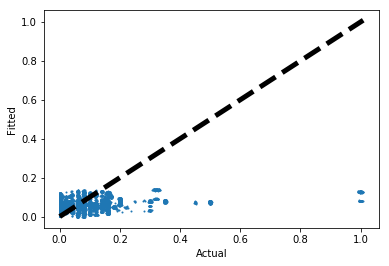

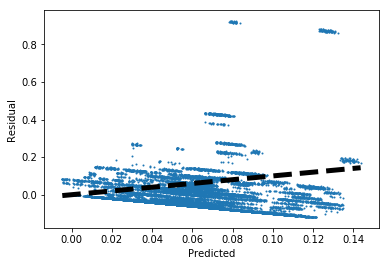

(False, True, False, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897544305653
 Test RMSE : 0.0897695611861
Predicted output 
[ 0.1245718   0.04702473  0.04723835 ...,  0.14862776  0.14849567
  0.14784145]
Residuals : 
[-0.1245718  -0.04702473 -0.04723835 ...,  0.04994468  0.0510744
  0.05335907]


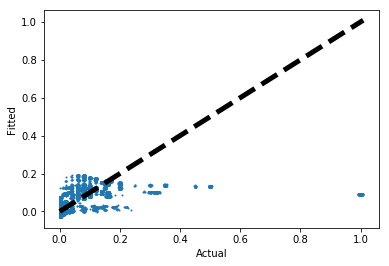

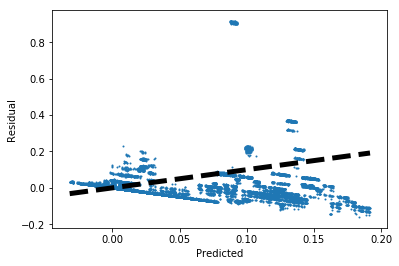

(False, True, False, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897553018062
 Test RMSE : 0.0897652274222
Predicted output 
[ 0.12512589  0.04778099  0.04779816 ...,  0.14782238  0.14781761
  0.14781189]
Residuals : 
[-0.12512589 -0.04778099 -0.04779816 ...,  0.05075006  0.05175246
  0.05338863]


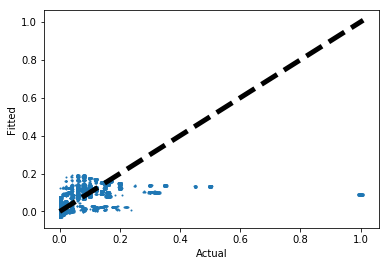

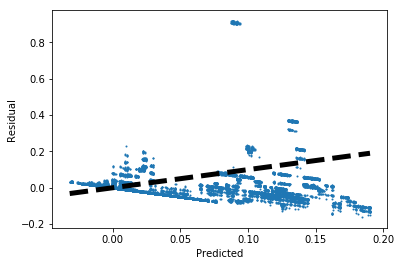

(False, True, False, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897568372317
 Test RMSE : 0.0897716511663
Predicted output 
[ 0.12479973  0.04717636  0.04741096 ...,  0.14861965  0.14848709
  0.14781952]
Residuals : 
[-0.12479973 -0.04717636 -0.04741096 ...,  0.04995278  0.05108298  0.053381  ]


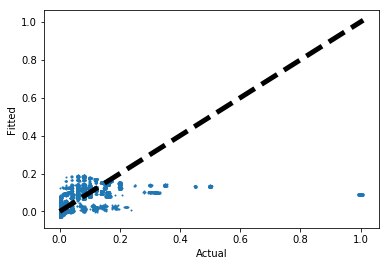

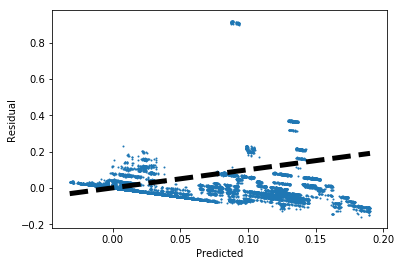

(False, True, True, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996372329214
 Test RMSE : 0.0997042848254
Predicted output 
[ 0.05047607  0.0629425   0.06477356 ...,  0.07630157  0.07442474
  0.07255554]
Residuals : 
[-0.05047607 -0.0629425  -0.06477356 ...,  0.12227086  0.12514533
  0.12864498]


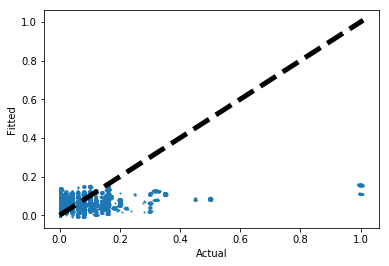

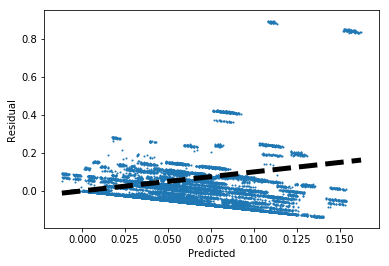

(False, True, True, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883368062064
 Test RMSE : 0.0883709042923
Predicted output 
[ 0.11813736  0.04084015  0.04091644 ...,  0.1370697   0.13694     0.13627052]
Residuals : 
[-0.11813736 -0.04084015 -0.04091644 ...,  0.06150273  0.06263007  0.06493   ]


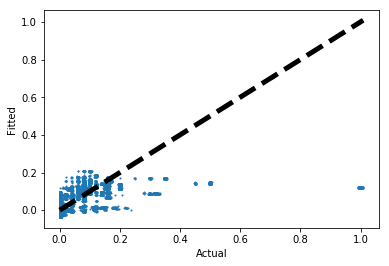

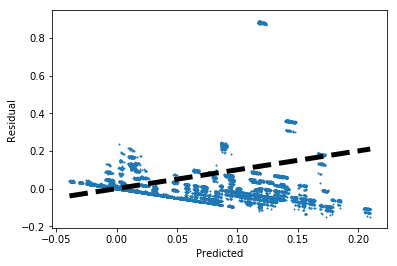

(False, True, True, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883382156147
 Test RMSE : 0.0883709827611
Predicted output 
[ 0.11840057  0.04122162  0.04124451 ...,  0.13627815  0.13627815
  0.13628006]
Residuals : 
[-0.11840057 -0.04122162 -0.04124451 ...,  0.06229428  0.06329192
  0.06492046]


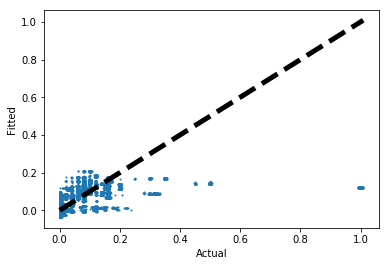

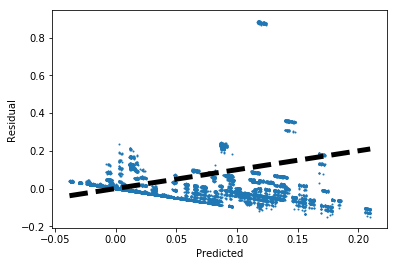

(False, True, True, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883383993375
 Test RMSE : 0.0883719818311
Predicted output 
[ 0.11806679  0.04078102  0.04083443 ...,  0.13694763  0.13681793
  0.13614464]
Residuals : 
[-0.11806679 -0.04078102 -0.04083443 ...,  0.0616248   0.06275214
  0.06505588]


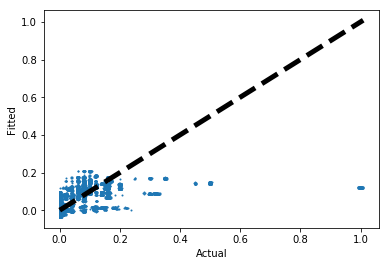

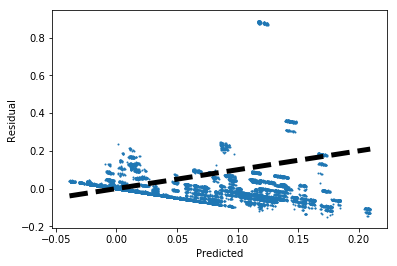

(True, False, False, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.10182787383
 Test RMSE : 6229983964.93
Predicted output 
[  8.36212898e+09   8.36212898e+09   8.36212898e+09 ...,  -1.09681653e+10
  -1.09681653e+10  -1.09681653e+10]
Residuals : 
[ -8.36212898e+09  -8.36212898e+09  -8.36212898e+09 ...,   1.09681653e+10
   1.09681653e+10   1.09681653e+10]


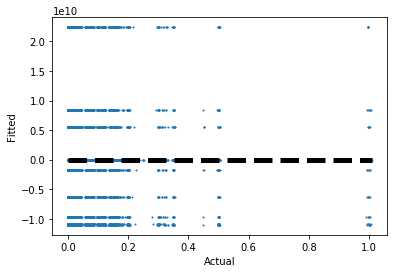

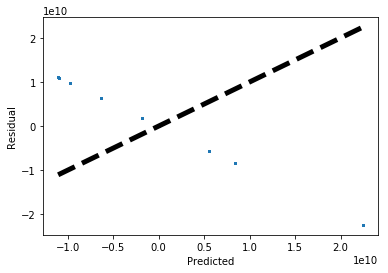

(True, False, False, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907861825285
 Test RMSE : 17288851561.9
Predicted output 
[ -8.34196027e+09  -8.34196027e+09  -8.34196027e+09 ...,  -2.08178394e+10
  -2.08178394e+10  -2.08178394e+10]
Residuals : 
[  8.34196027e+09   8.34196027e+09   8.34196027e+09 ...,   2.08178394e+10
   2.08178394e+10   2.08178394e+10]


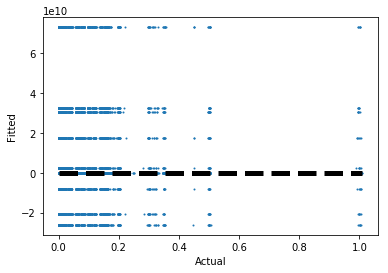

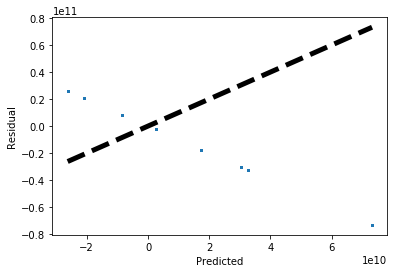

(True, False, False, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907879242943
 Test RMSE : 13083609182.7
Predicted output 
[ -8.70747434e+09  -8.70747434e+09  -8.70747434e+09 ...,  -2.09667752e+10
  -2.09667752e+10  -2.09667752e+10]
Residuals : 
[  8.70747434e+09   8.70747434e+09   8.70747434e+09 ...,   2.09667752e+10
   2.09667752e+10   2.09667752e+10]


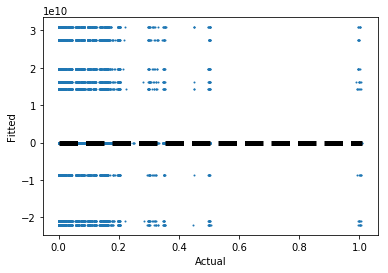

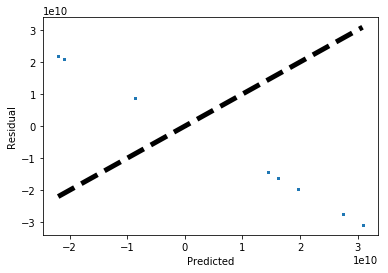

(True, False, False, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0908921180385
 Test RMSE : 126836093014.0
Predicted output 
[ -2.59905203e+10  -2.59905203e+10  -2.59905203e+10 ...,  -1.49937396e+11
  -1.49937396e+11  -1.49937396e+11]
Residuals : 
[  2.59905203e+10   2.59905203e+10   2.59905203e+10 ...,   1.49937396e+11
   1.49937396e+11   1.49937396e+11]


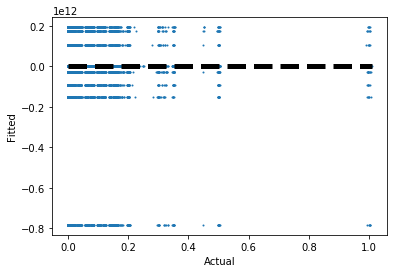

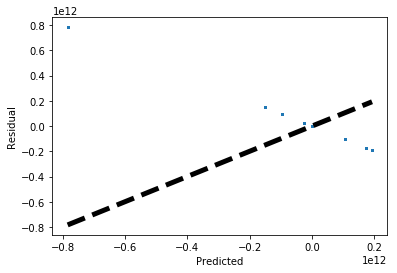

(True, False, True, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100579025263
 Test RMSE : 5462432578.39
Predicted output 
[  9.01337051e+09   9.01337051e+09   9.01337051e+09 ...,  -8.96533977e+09
  -8.96533977e+09  -8.96533977e+09]
Residuals : 
[ -9.01337051e+09  -9.01337051e+09  -9.01337051e+09 ...,   8.96533977e+09
   8.96533977e+09   8.96533977e+09]


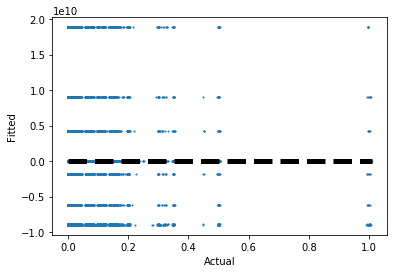

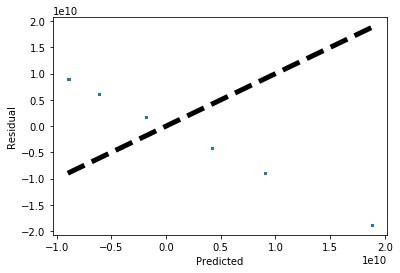

(True, False, True, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893765632391
 Test RMSE : 24410586785.8
Predicted output 
[ -1.45441203e+10  -1.45441203e+10  -1.45441203e+10 ...,  -1.14896669e+11
  -1.14896669e+11  -1.14896669e+11]
Residuals : 
[  1.45441203e+10   1.45441203e+10   1.45441203e+10 ...,   1.14896669e+11
   1.14896669e+11   1.14896669e+11]


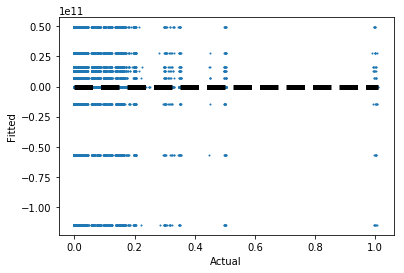

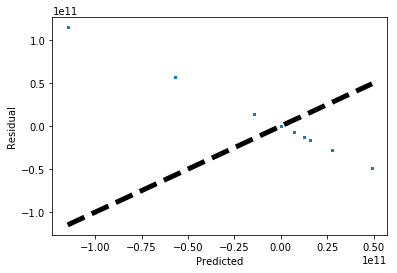

(True, False, True, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893778154002
 Test RMSE : 17306136180.3
Predicted output 
[ -6.72766719e+10  -6.72766719e+10  -6.72766719e+10 ...,  -1.81958652e+10
  -1.81958652e+10  -1.81958652e+10]
Residuals : 
[  6.72766719e+10   6.72766719e+10   6.72766719e+10 ...,   1.81958652e+10
   1.81958652e+10   1.81958652e+10]


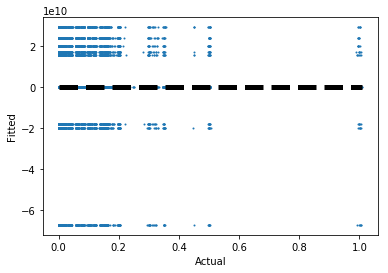

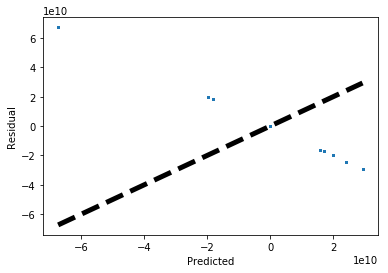

(True, False, True, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893912316873
 Test RMSE : 64540144598.5
Predicted output 
[  1.40098925e+10   1.40098925e+10   1.40098925e+10 ...,  -1.73551059e+11
  -1.73551059e+11  -1.73551059e+11]
Residuals : 
[ -1.40098925e+10  -1.40098925e+10  -1.40098925e+10 ...,   1.73551059e+11
   1.73551059e+11   1.73551059e+11]


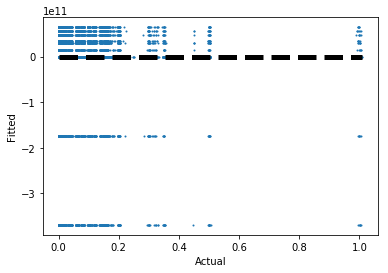

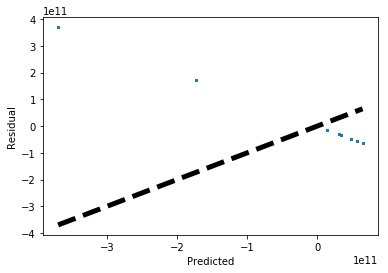

(True, True, False, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100886975108
 Test RMSE : 9740647033.04
Predicted output 
[  8.46961411e+09   8.46961411e+09   8.46961411e+09 ...,  -1.95169701e+10
  -1.95169701e+10  -1.95169701e+10]
Residuals : 
[ -8.46961411e+09  -8.46961411e+09  -8.46961411e+09 ...,   1.95169701e+10
   1.95169701e+10   1.95169701e+10]


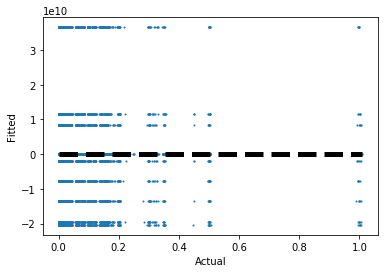

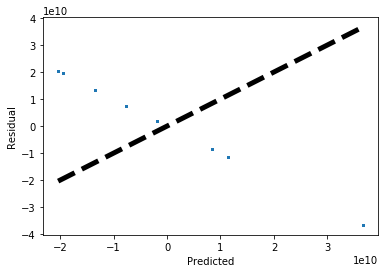

(True, True, False, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897582477959
 Test RMSE : 42918039104.2
Predicted output 
[ -2.62041377e+10  -2.62041377e+10  -2.62041377e+10 ...,  -2.00496045e+10
  -2.00496045e+10  -2.00496045e+10]
Residuals : 
[  2.62041377e+10   2.62041377e+10   2.62041377e+10 ...,   2.00496045e+10
   2.00496045e+10   2.00496045e+10]


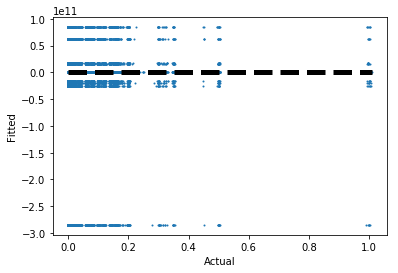

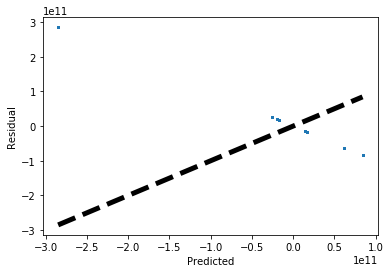

(True, True, False, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897536158281
 Test RMSE : 15311009605.0
Predicted output 
[ -1.79622041e+09  -1.79622041e+09  -1.79622041e+09 ...,  -2.95519019e+10
  -2.95519019e+10  -2.95519019e+10]
Residuals : 
[  1.79622041e+09   1.79622041e+09   1.79622041e+09 ...,   2.95519019e+10
   2.95519019e+10   2.95519019e+10]


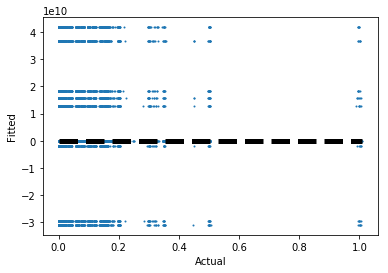

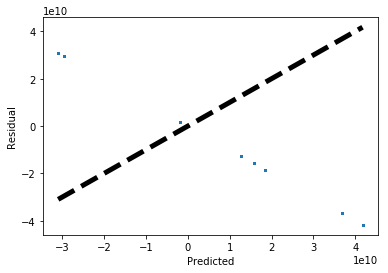

(True, True, False, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0898083748316
 Test RMSE : 41315833163.9
Predicted output 
[  2.08005054e+10   2.08005054e+10   2.08005054e+10 ...,   8.22017648e+10
   8.22017648e+10   8.22017648e+10]
Residuals : 
[ -2.08005054e+10  -2.08005054e+10  -2.08005054e+10 ...,  -8.22017648e+10
  -8.22017648e+10  -8.22017648e+10]


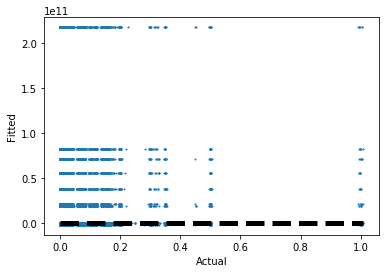

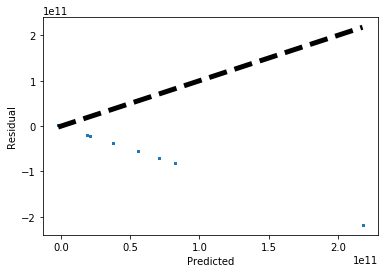

(True, True, True, False, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996342358976
 Test RMSE : 14638453849.8
Predicted output 
[ -7.84506114e+10  -7.84506114e+10  -7.84506114e+10 ...,  -1.75065502e+10
  -1.75065502e+10  -1.75065502e+10]
Residuals : 
[  7.84506114e+10   7.84506114e+10   7.84506114e+10 ...,   1.75065502e+10
   1.75065502e+10   1.75065502e+10]


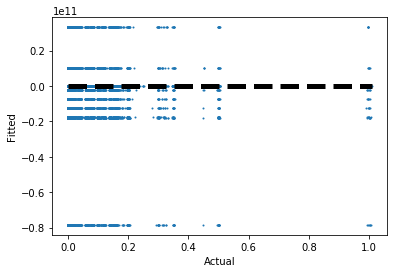

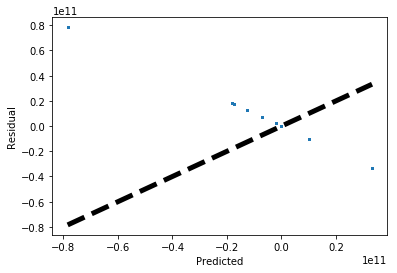

(True, True, True, False, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883404592297
 Test RMSE : 98389376024.4
Predicted output 
[ -6.85527405e+10  -6.85527405e+10  -6.85527405e+10 ...,  -8.03062895e+10
  -8.03062895e+10  -8.03062895e+10]
Residuals : 
[  6.85527405e+10   6.85527405e+10   6.85527405e+10 ...,   8.03062895e+10
   8.03062895e+10   8.03062895e+10]


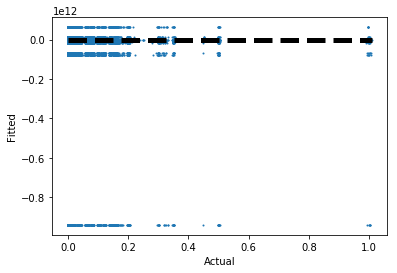

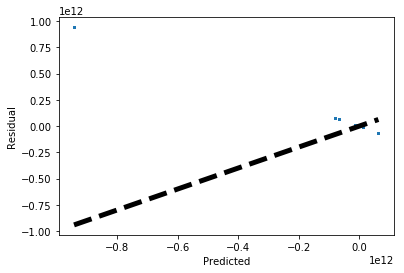

(True, True, True, True, False)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.088336062389
 Test RMSE : 15104610978.0
Predicted output 
[ -7.04697813e+09  -7.04697813e+09  -7.04697813e+09 ...,  -2.74722860e+10
  -2.74722860e+10  -2.74722860e+10]
Residuals : 
[  7.04697813e+09   7.04697813e+09   7.04697813e+09 ...,   2.74722860e+10
   2.74722860e+10   2.74722860e+10]


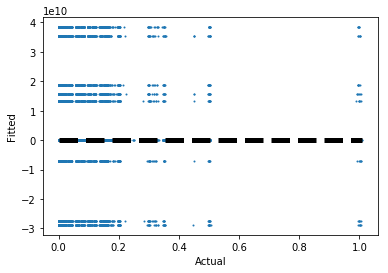

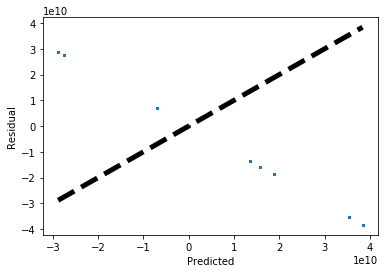

(True, True, True, True, True)
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.088367252969
 Test RMSE : 375538179371.0
Predicted output 
[ -2.34405430e+11  -2.34405430e+11  -2.34405430e+11 ...,  -1.15667036e+12
  -1.15667036e+12  -1.15667036e+12]
Residuals : 
[  2.34405430e+11   2.34405430e+11   2.34405430e+11 ...,   1.15667036e+12
   1.15667036e+12   1.15667036e+12]


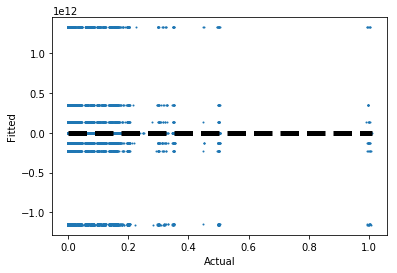

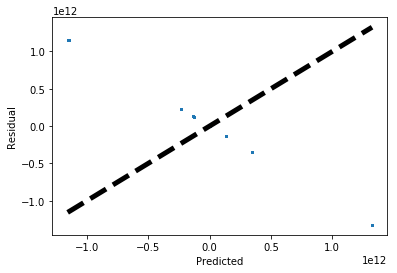

######################################
[0.090791999599972417, 0.090794880989626667, 0.09079408769130827, 0.10058534034398112, 0.089383543511988545, 0.089384646410558807, 0.089384018981179286, 0.10088955024993915, 0.089754430565272061, 0.089755301806190332, 0.089756837231697445, 0.099637232921423513, 0.088336806206392907, 0.088338215614689616, 0.088338399337548543, 0.10182787383024675, 0.090786182528489301, 0.090787924294328554, 0.090892118038459688, 0.10057902526309745, 0.089376563239143308, 0.089377815400180666, 0.089391231687257572, 0.10088697510750042, 0.089758247795945184, 0.089753615828093117, 0.089808374831576665, 0.099634235897575085, 0.088340459229675705, 0.08833606238901752, 0.088367252968981805]
[0.090828542059355658, 0.09081773124311171, 0.090832139107761917, 0.10066942083051036, 0.089437747738875112, 0.089438155442736783, 0.089448869567897257, 0.10093820650961456, 0.089769561186118965, 0.089765227422204191, 0.089771651166288186, 0.099704284825375022, 0.088370904292261923, 0

In [23]:
# Task 2 a iv continued
rmse_train_com=[]
rmse_test_com=[]
count=2
for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"
        
        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        reg.fit(X_train, y_train)
        y_test_predicted = reg.predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=reg.predict(X_train)
        rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
        rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
    average_train_RMSE=sum(rmse_train)/10
    average_test_RMSE=sum(rmse_test)/10
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_train_com.append(average_train_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted=np.concatenate(y_predicted_fold, axis=0)
    print "Predicted output "
    print y_predicted
    y_residual=y-y_predicted
    print "Residuals : "
    print y_residual
    plot_val(y,y_predicted,'Actual','Fitted','2aiv_ActualvsFitted_'+str(count)+'.png')
    plot_val(y_predicted,y_residual,'Predicted','Residual','2aiv_PredictedvsResidual_'+str(count)+'.png')
    count=count+1
    
    
print "######################################"
print rmse_train_com
print rmse_test_com

best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101833880473
 Test RMSE : 0.101900832475


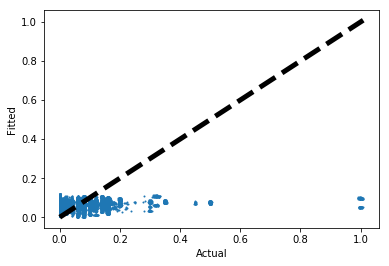

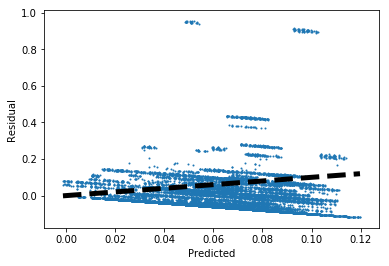

In [3]:
#Task 2 a v, with Ridge Regularization
#Here we first find the best value of alpha by doing RidgeCV, and then apply Ridge function to get the TestRMSE for the same
#By using Regularization,  we will control ill-conditioning and over-fitting
#This is done by applying Ridge,LAsso,Elastic Net regularizations and analyzing again

#First doing for all scalar
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV( cv=10)
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
ohenc_best = OneHotEncoder(categorical_features= (False, False, False, False, False))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)

ridge_reg.fit(xoh, y, sample_weight=None)
print "best alpha for comination is :"
print ridge_reg.alpha_
#ridge_reg.cv_values_
#best alpha for ridge=0.1
ridge_reg_2 = linear_model.Ridge(alpha=ridge_reg.alpha_)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    ridge_reg_2.fit(X_train, y_train)
    y_test_predicted = ridge_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=ridge_reg_2.predict(X_train)
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
y_residual=y-y_predicted_fold
plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_Ridge_1.png')
plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_Ridge_1.png')

(False, False, False, False, True)
best alpha for comination is :
1.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907918873516
 Test RMSE : 0.0908272384823


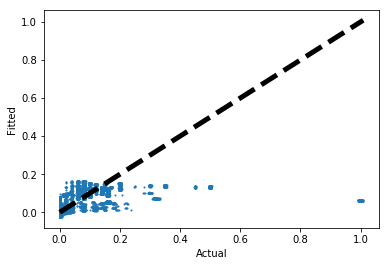

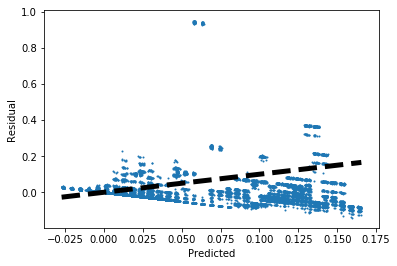

(False, False, False, True, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907932612809
 Test RMSE : 0.0908259545393


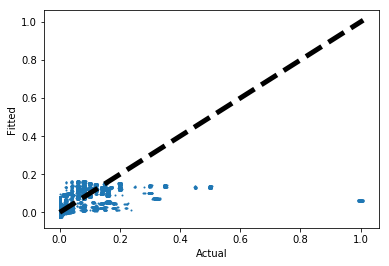

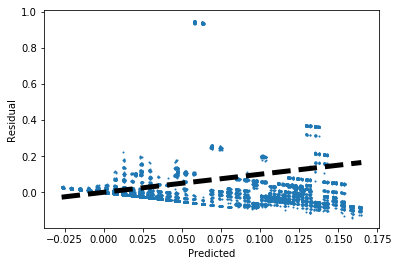

(False, False, False, True, True)
best alpha for comination is :
1.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907918470943
 Test RMSE : 0.090827113123


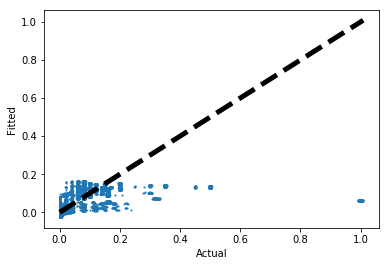

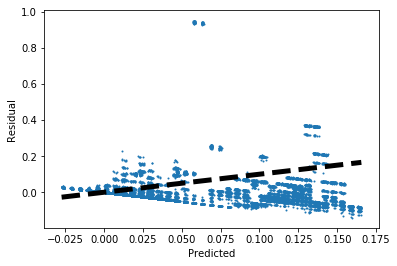

(False, False, True, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100585231351
 Test RMSE : 0.100669565236


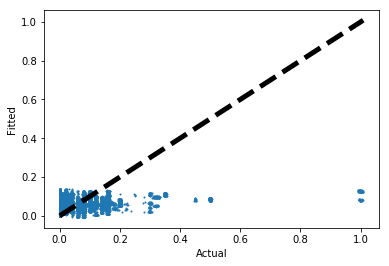

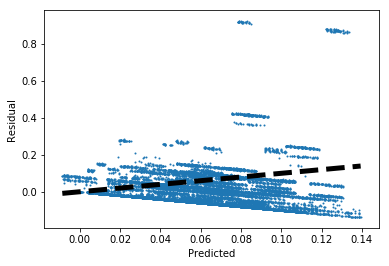

(False, False, True, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893864350472
 Test RMSE : 0.0894426407325


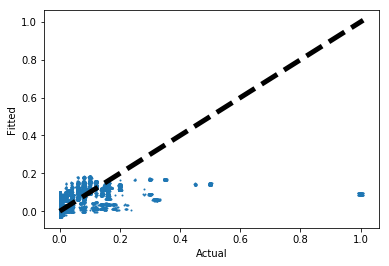

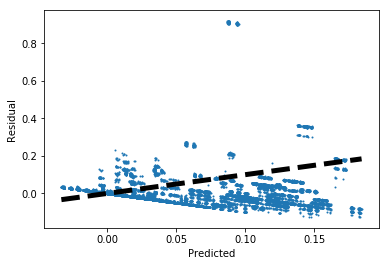

(False, False, True, True, False)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893836575541
 Test RMSE : 0.0894367336492


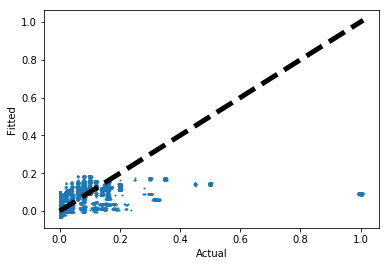

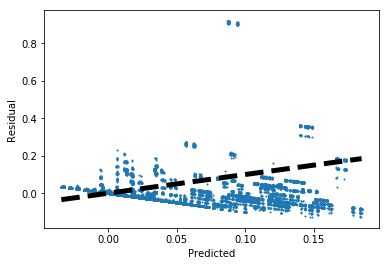

(False, False, True, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893824751286
 Test RMSE : 0.0894378250934


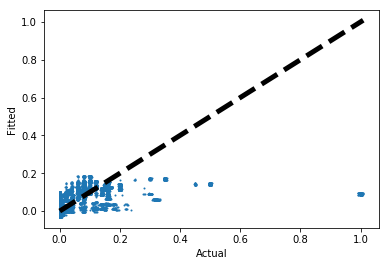

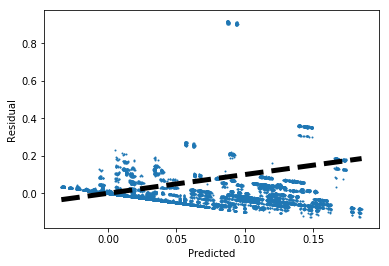

(False, True, False, False, False)
best alpha for comination is :
1.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100888026442
 Test RMSE : 0.100937500135


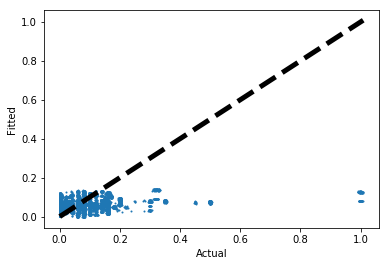

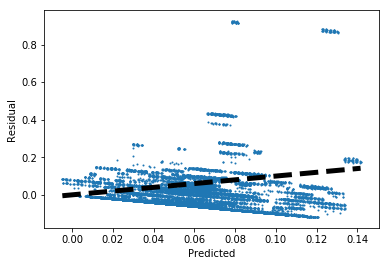

(False, True, False, False, True)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897517375862
 Test RMSE : 0.0897671492564


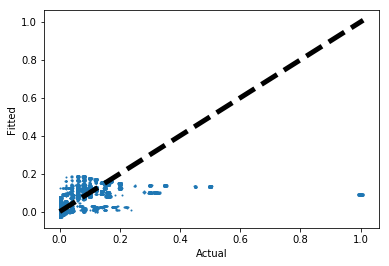

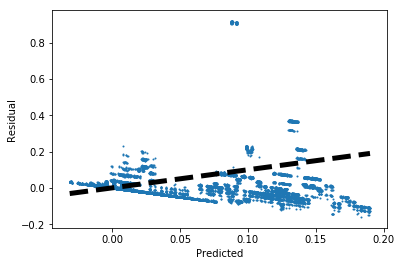

(False, True, False, True, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.089753180278
 Test RMSE : 0.0897659905779


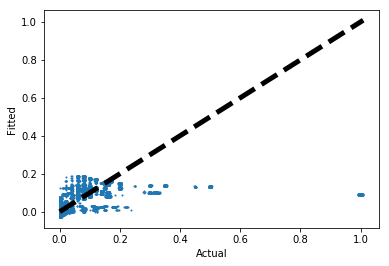

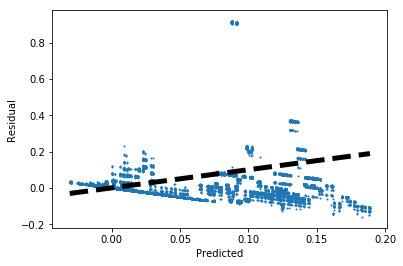

(False, True, False, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897518531674
 Test RMSE : 0.0897671268086


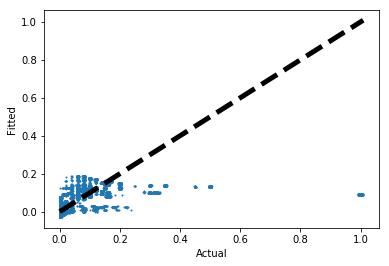

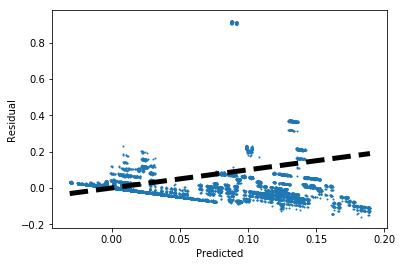

(False, True, True, False, False)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996355658601
 Test RMSE : 0.0997018236757


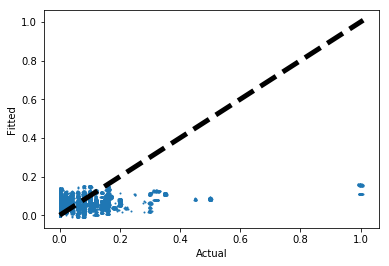

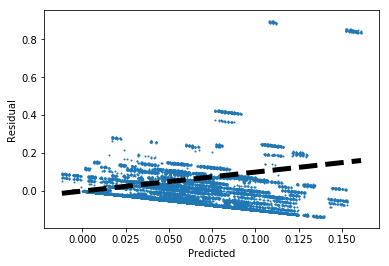

(False, True, True, False, True)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883344889905
 Test RMSE : 0.0883689879682


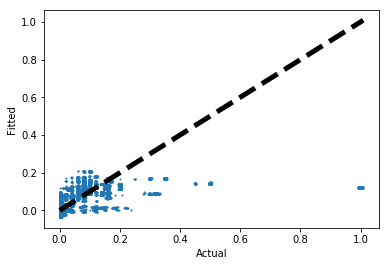

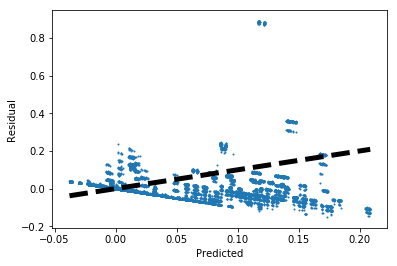

(False, True, True, True, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883359723197
 Test RMSE : 0.0883677448525


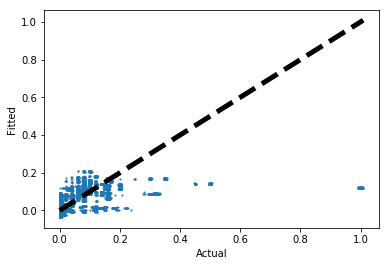

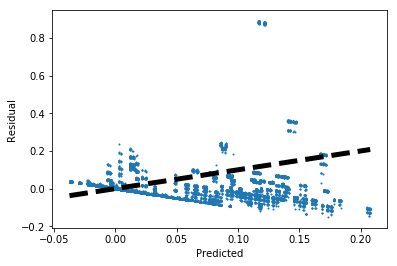

(False, True, True, True, True)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883344885756
 Test RMSE : 0.0883689786256


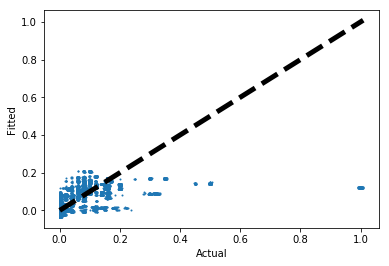

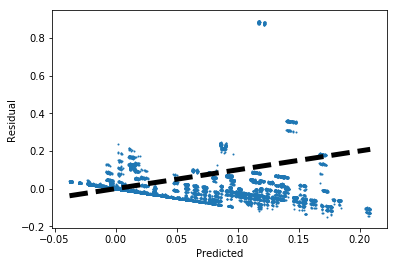

(True, False, False, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101828135948
 Test RMSE : 0.102114221689


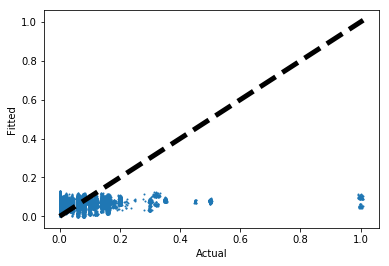

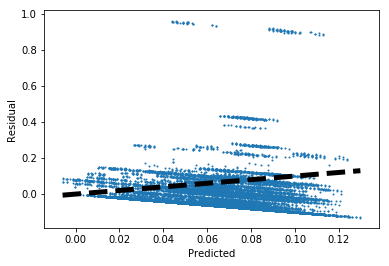

(True, False, False, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907891497361
 Test RMSE : 0.0910131683045


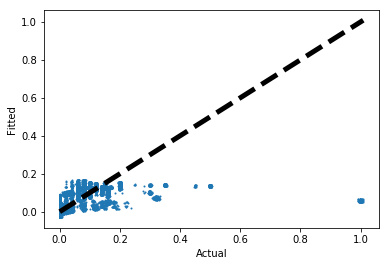

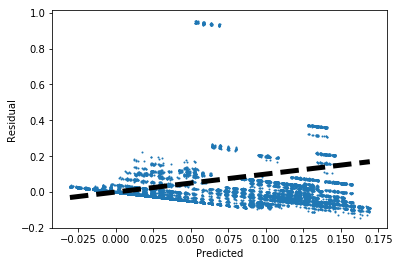

(True, False, False, True, False)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907862929593
 Test RMSE : 0.0928154777009


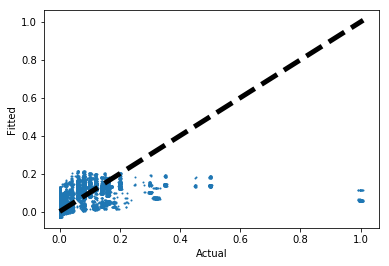

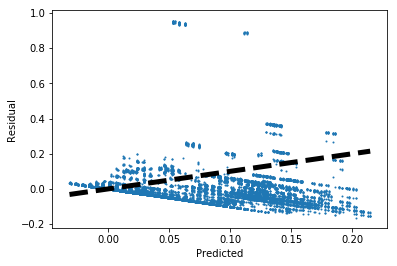

(True, False, False, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907852517403
 Test RMSE : 0.0910078151048


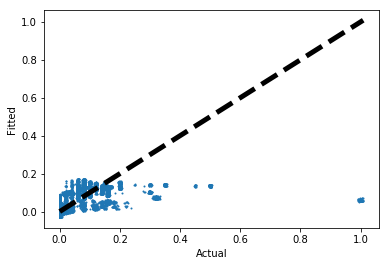

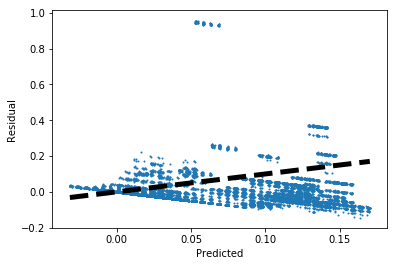

(True, False, True, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100579540531
 Test RMSE : 0.10089777624


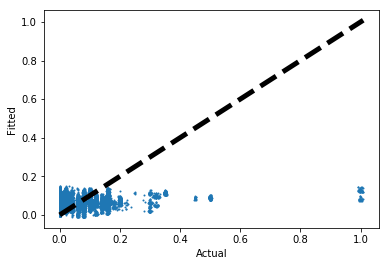

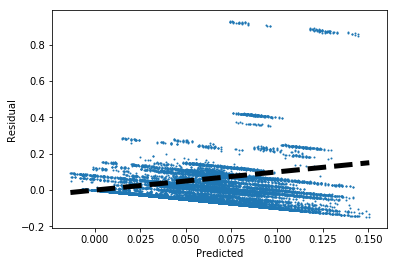

(True, False, True, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893797785269
 Test RMSE : 0.0896335531352


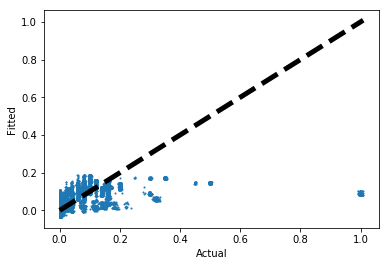

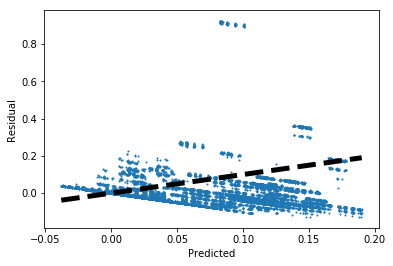

(True, False, True, True, False)
best alpha for comination is :
0.1
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.089376768187
 Test RMSE : 0.0922448905392


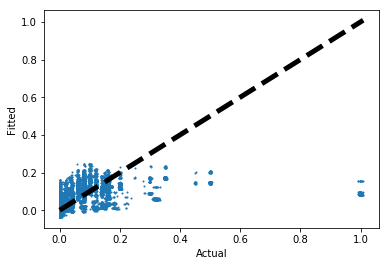

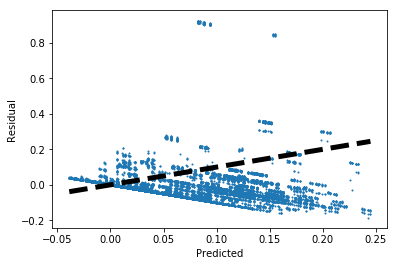

(True, False, True, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893758187358
 Test RMSE : 0.0896279785385


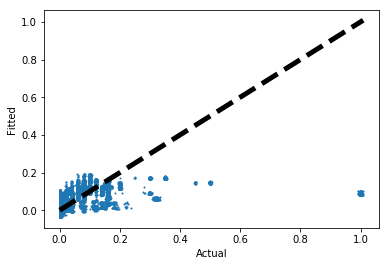

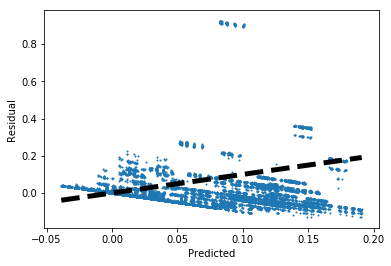

(True, True, False, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100886732989
 Test RMSE : 0.1010226818


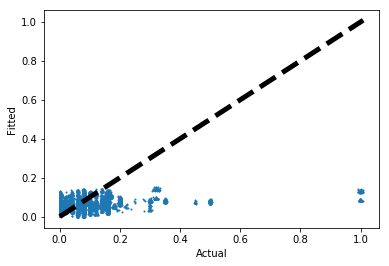

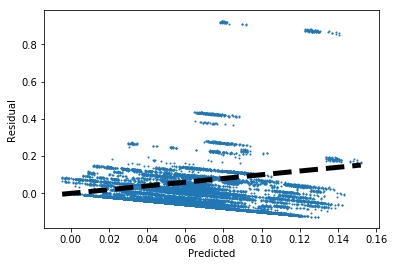

(True, True, False, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897545088681
 Test RMSE : 0.0898008497762


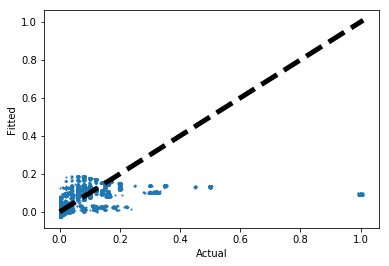

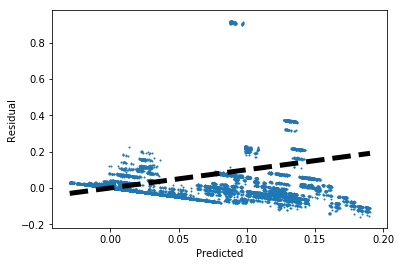

(True, True, False, True, False)
best alpha for comination is :
1.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897516240886
 Test RMSE : 0.0903554871656


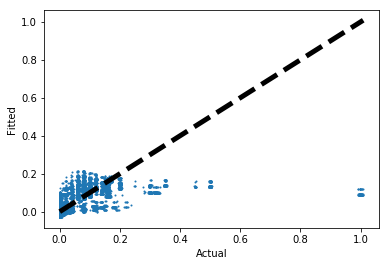

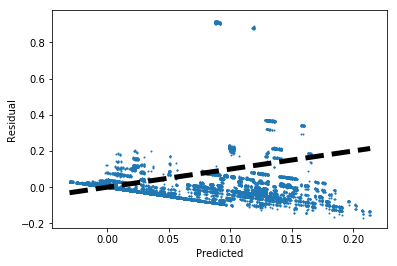

(True, True, False, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897505690839
 Test RMSE : 0.0897952243594


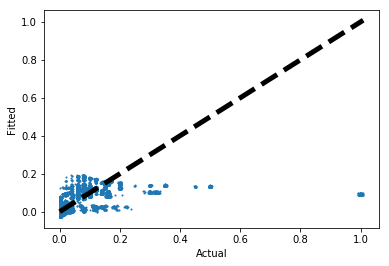

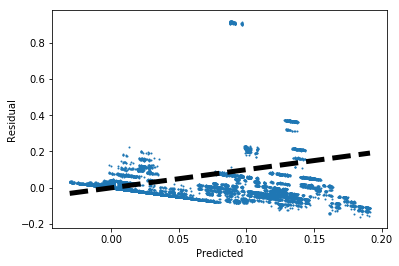

(True, True, True, False, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996342778372
 Test RMSE : 0.0998036007151


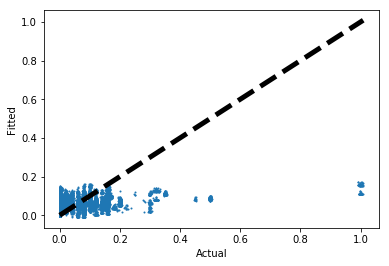

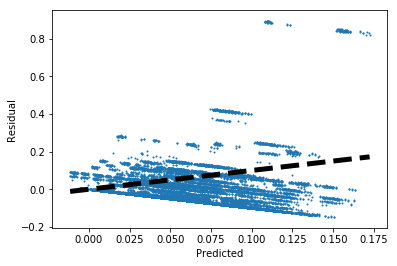

(True, True, True, False, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883373414477
 Test RMSE : 0.0884127240393


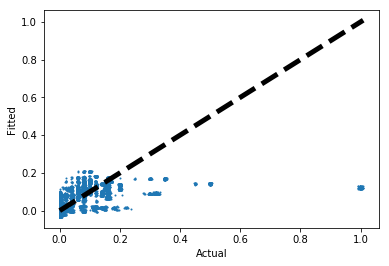

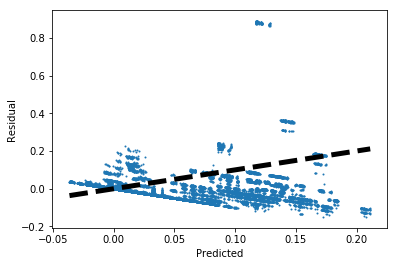

(True, True, True, True, False)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883346782763
 Test RMSE : 0.0884056447793


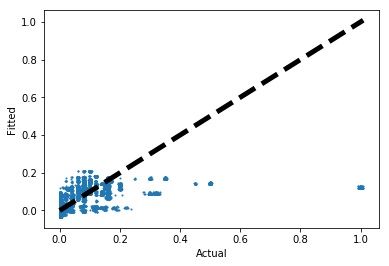

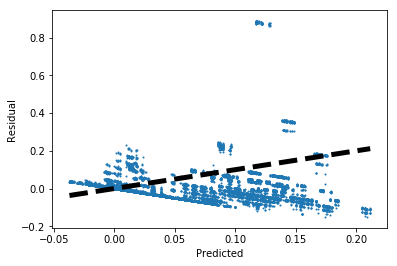

(True, True, True, True, True)
best alpha for comination is :
10.0
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883333380629
 Test RMSE : 0.088406841536


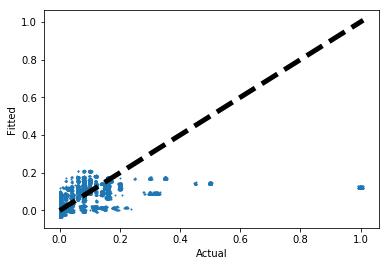

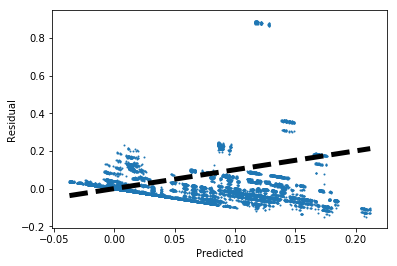

The minimum test RMSE obatined was for :
0.0883677448525
[1.0, 10.0, 1.0, 10.0, 10.0, 0.1, 10.0, 1.0, 0.1, 10.0, 10.0, 0.1, 0.1, 10.0, 0.1, 10.0, 10.0, 0.1, 10.0, 10.0, 10.0, 0.1, 10.0, 10.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 10.0]
[0.090791999599972417, 0.090794880989626667, 0.09079408769130827, 0.10058534034398112, 0.089383543511988545, 0.089384646410558807, 0.089384018981179286, 0.10088955024993915, 0.089754430565272061, 0.089755301806190332, 0.089756837231697445, 0.099637232921423513, 0.088336806206392907, 0.088338215614689616, 0.088338399337548543, 0.10182787383024675, 0.090786182528489301, 0.090787924294328554, 0.090892118038459688, 0.10057902526309745, 0.089376563239143308, 0.089377815400180666, 0.089391231687257572, 0.10088697510750042, 0.089758247795945184, 0.089753615828093117, 0.089808374831576665, 0.099634235897575085, 0.088340459229675705, 0.08833606238901752, 0.088367252968981805]
[0.090827238482311029, 0.090825954539267298, 0.090827113123024966, 0.10066956523648704, 0.0

In [26]:
#Now applying Ridge for remaining 31 combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
ridge_reg = linear_model.RidgeCV( cv=10)
rmse_test_com=[]
alphalist=[]
count=2
for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    ridge_reg.fit(xoh, y, sample_weight=None)
    print "best alpha for comination is :"
    print ridge_reg.alpha_
    alphalist.append(ridge_reg.alpha_)
    ridge_reg_2 = linear_model.Ridge(alpha=ridge_reg.alpha_)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"

        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        ridge_reg_2.fit(X_train, y_train)
        y_test_predicted = ridge_reg_2.predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=ridge_reg_2.predict(X_train)
        rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
        rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
    average_train_RMSE=sum(rmse_train)/10
    average_test_RMSE=sum(rmse_test)/10
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
    y_residual=y-y_predicted_fold
    plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_Ridge_'+str(count)+'.png')
    plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_Ridge_'+str(count)+'.png')
    count=count+1
print "The minimum test RMSE obatined was for :"
print min(rmse_test_com)

print alphalist
print rmse_train_com
print rmse_test_com

best alpha for comination is :
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834773697
 Test RMSE : 0.101899979376


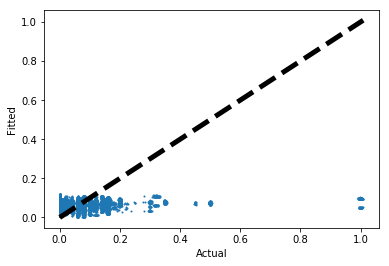

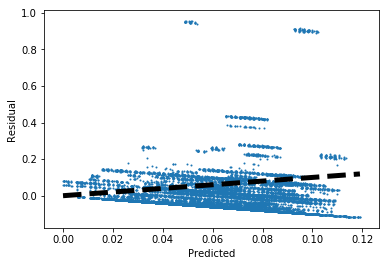

In [8]:
#applying lasso for the very first combination
from sklearn import linear_model
lasso_reg = linear_model.LassoCV( cv=10,random_state=27)
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
ohenc_best = OneHotEncoder(categorical_features= (False, False, False, False, False))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)

lasso_reg.fit(xoh, y)
print "best alpha for comination is :"
print lasso_reg.alpha_
#lasso_reg.cv_values_
#best alpha for lasso=0.1
lasso_reg_2 = linear_model.Lasso(alpha=lasso_reg.alpha_, random_state=27)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    lasso_reg_2.fit(X_train, y_train)
    y_test_predicted = lasso_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=lasso_reg_2.predict(X_train)
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold,axis=0)
y_residual=y-y_predicted_fold
plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_Lasso_1.png')
plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_Lasso_1.png')

(False, False, False, False, True)
2.25371698678e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907937016117
 Test RMSE : 0.0908296399986


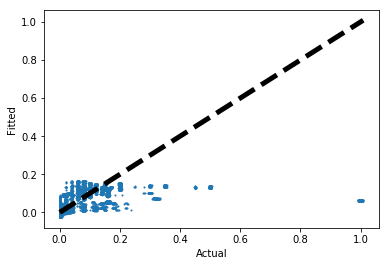

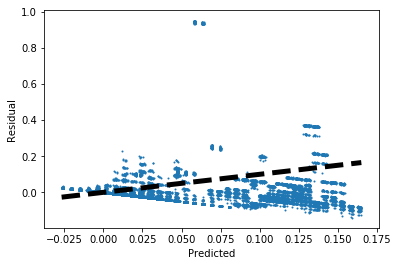

(False, False, False, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907956642164
 Test RMSE : 0.0908276659301


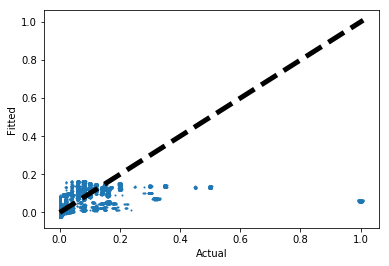

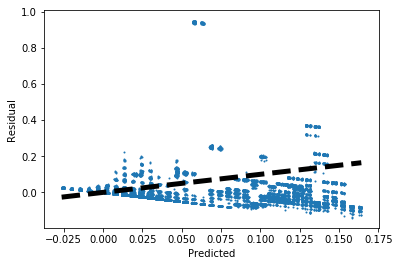

(False, False, False, True, True)
5.20637854674e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907934357713
 Test RMSE : 0.0908259330926


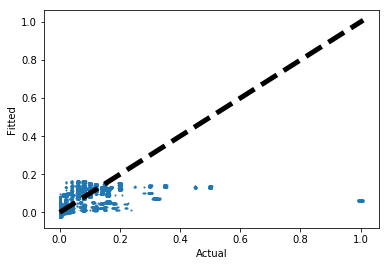

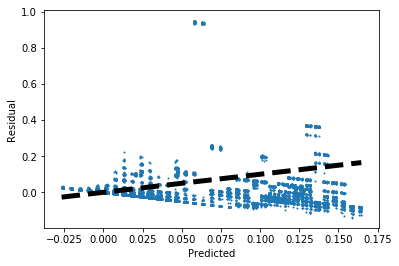

(False, False, True, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100588775236
 Test RMSE : 0.100672167668


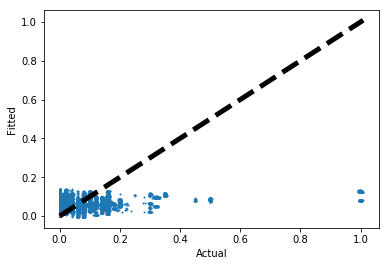

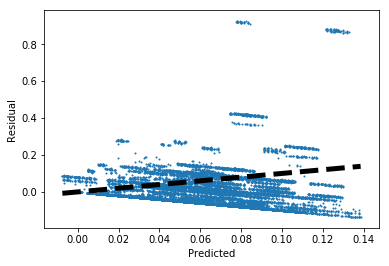

(False, False, True, False, True)
2.25371698678e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893843495957
 Test RMSE : 0.0894404355809


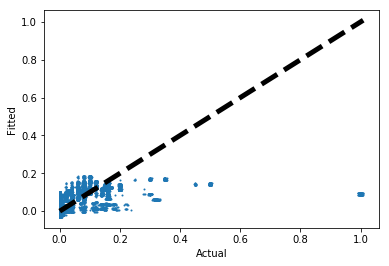

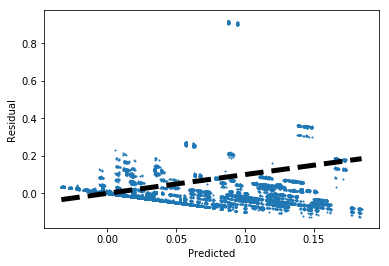

(False, False, True, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893900665521
 Test RMSE : 0.0894417003346


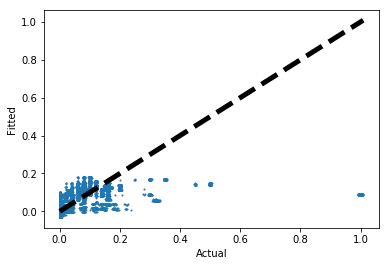

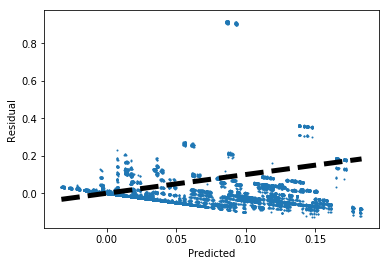

(False, False, True, True, True)
2.41658685261e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893833159464
 Test RMSE : 0.0894367117741


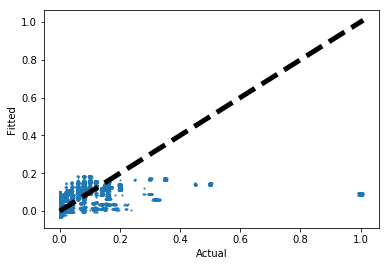

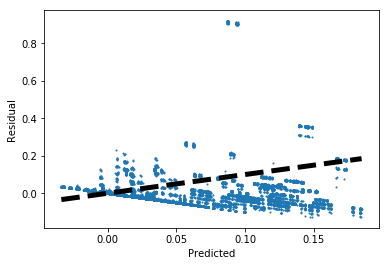

(False, True, False, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100891892327
 Test RMSE : 0.100940435427


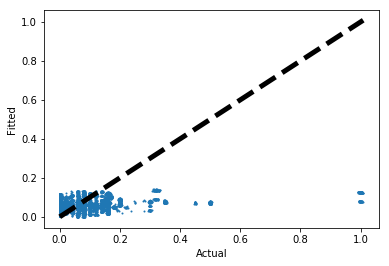

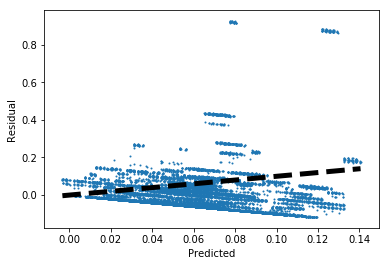

(False, True, False, False, True)
1.59661592304e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897527764863
 Test RMSE : 0.0897685529296


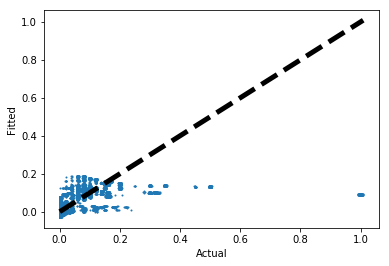

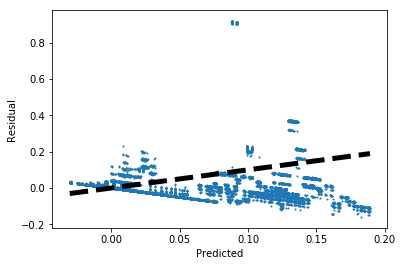

(False, True, False, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897597820624
 Test RMSE : 0.0897720710825


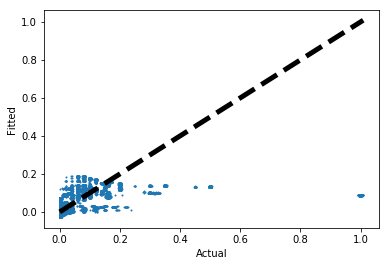

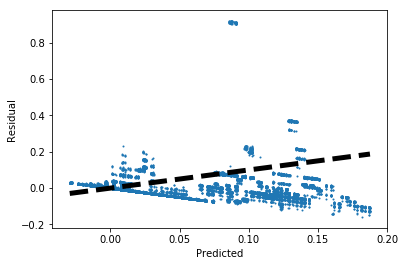

(False, True, False, True, True)
2.42671423664e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897526979294
 Test RMSE : 0.0897659493305


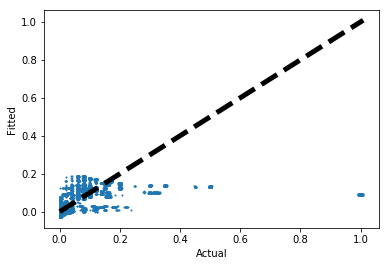

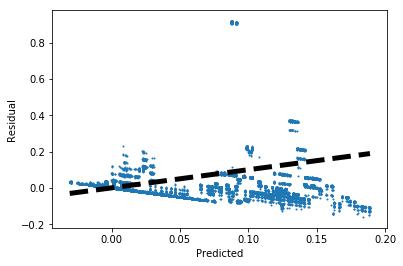

(False, True, True, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996430064451
 Test RMSE : 0.0997079747328


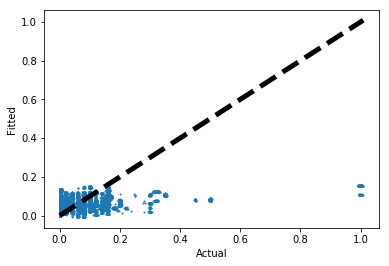

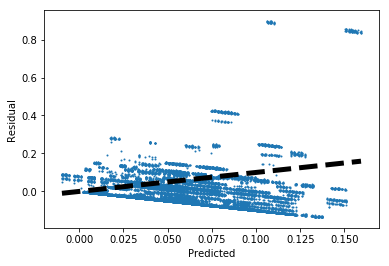

(False, True, True, False, True)
5.65357028874e-06
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.088334646471
 Test RMSE : 0.0883692890597


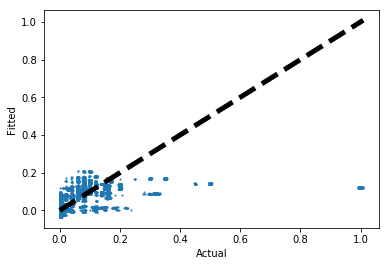

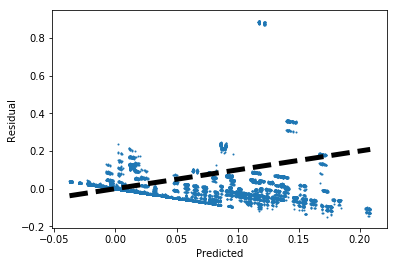

(False, True, True, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883466180586
 Test RMSE : 0.08837744056


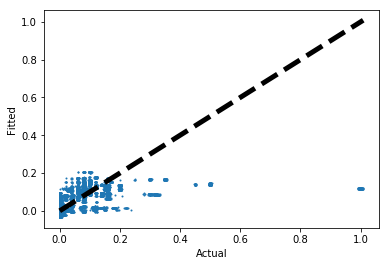

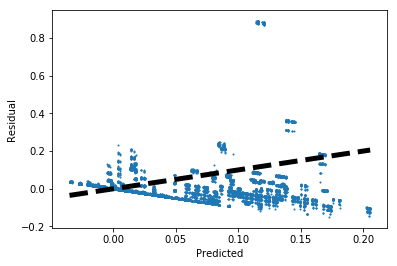

(False, True, True, True, True)
2.25183926814e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883354900111
 Test RMSE : 0.0883679995966


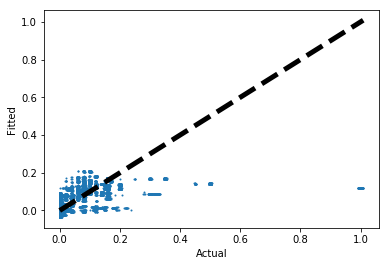

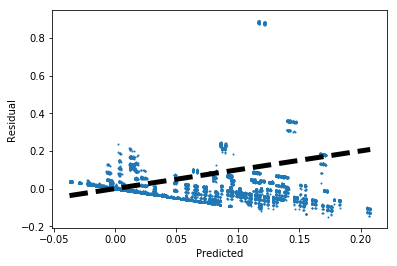

(True, False, False, False, False)
0.00022705302024
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834407088
 Test RMSE : 0.101896278545


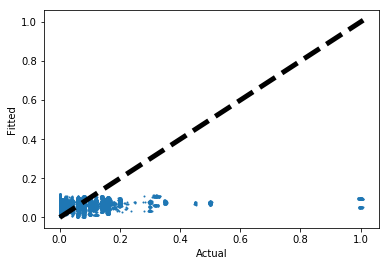

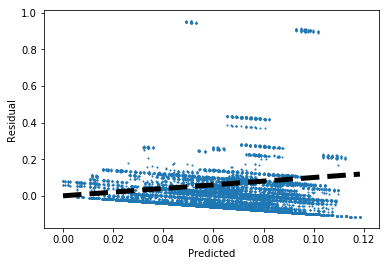

(True, False, False, False, True)
0.000120274097107
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0908386870476
 Test RMSE : 0.0909240179156


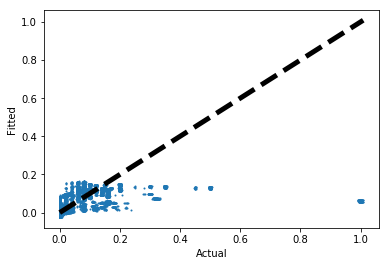

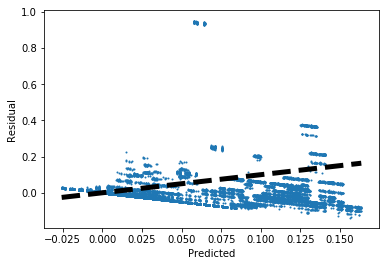

(True, False, False, True, False)
0.00022705302024
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0908001334536
 Test RMSE : 0.0908267314263


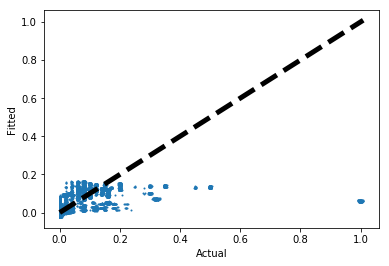

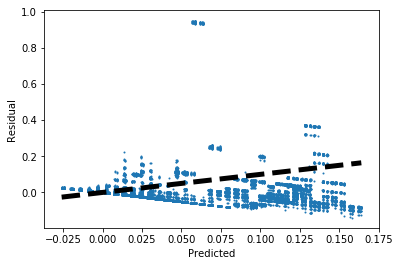

(True, False, False, True, True)
0.000225371698678
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907991448468
 Test RMSE : 0.0908257280421


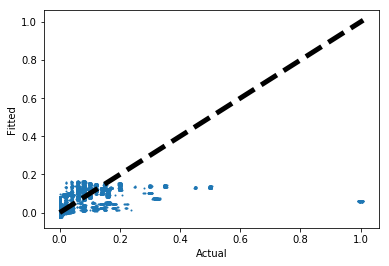

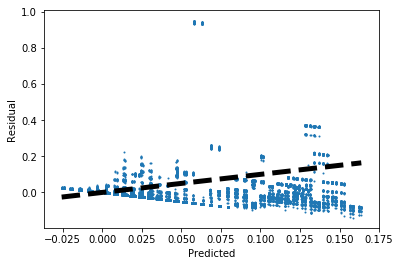

(True, False, True, False, False)
0.000211750406596
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100593680355
 Test RMSE : 0.100672459809


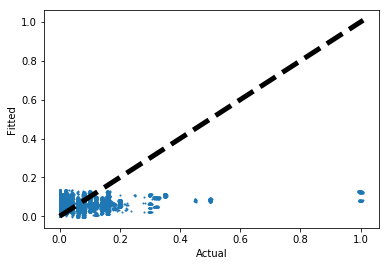

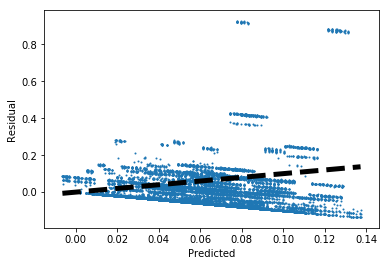

(True, False, True, False, True)
0.000112168025505
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0894256004464
 Test RMSE : 0.0895347745058


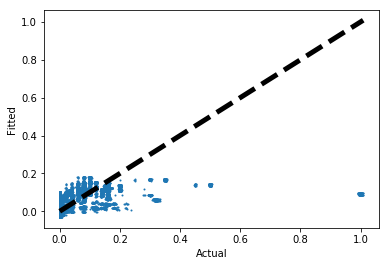

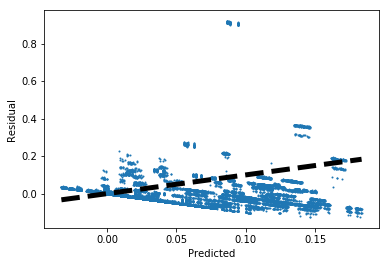

(True, False, True, True, False)
0.000211750406596
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893986360058
 Test RMSE : 0.089445437533


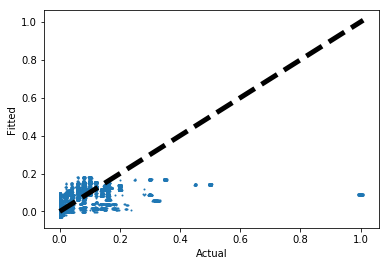

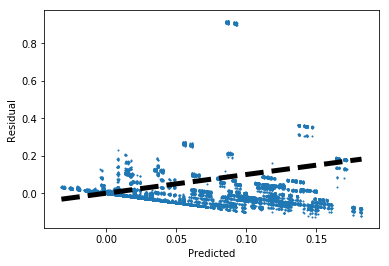

(True, False, True, True, True)
0.00021018240048
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893976133942
 Test RMSE : 0.0894446025422


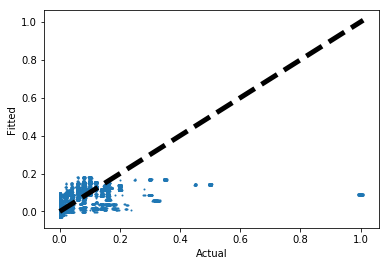

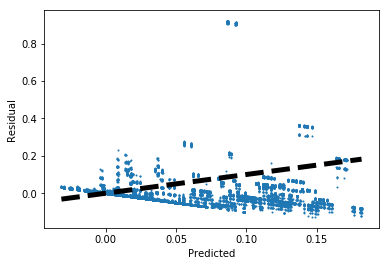

(True, True, False, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100891949277
 Test RMSE : 0.100939558044


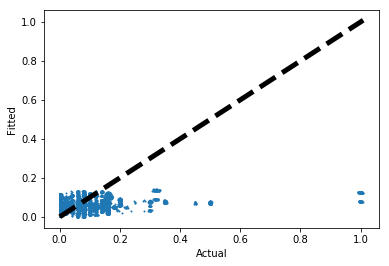

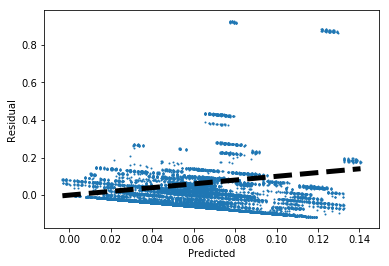

(True, True, False, False, True)
2.42671423664e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897531846794
 Test RMSE : 0.0897726061349


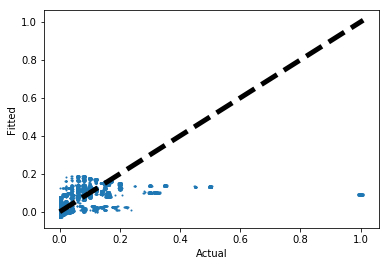

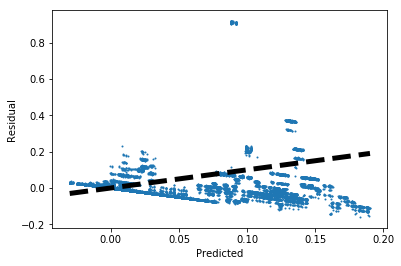

(True, True, False, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897598263966
 Test RMSE : 0.089771316955


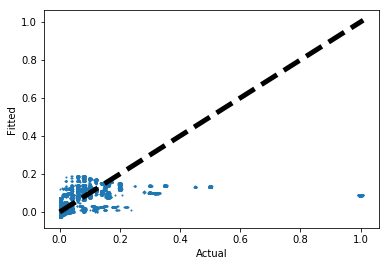

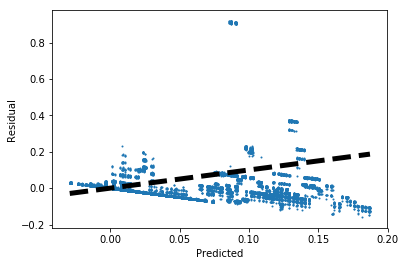

(True, True, False, True, True)
6.01115645834e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897541716462
 Test RMSE : 0.0897664743764


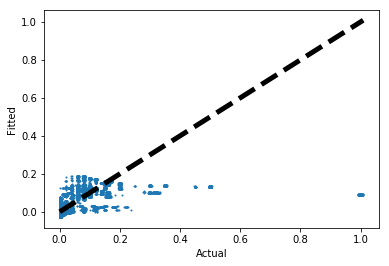

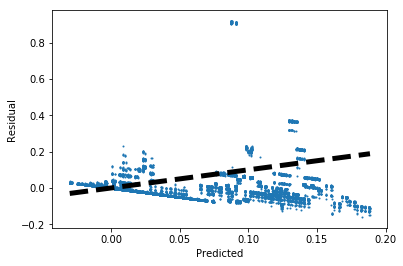

(True, True, True, False, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996430585041
 Test RMSE : 0.0997071614424


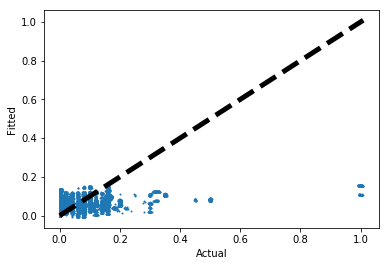

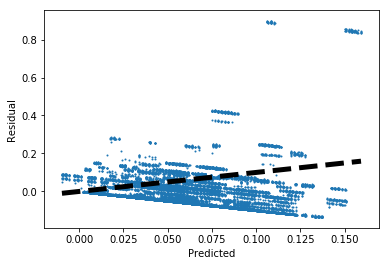

(True, True, True, False, True)
1.98507692666e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883352197645
 Test RMSE : 0.0883738737348


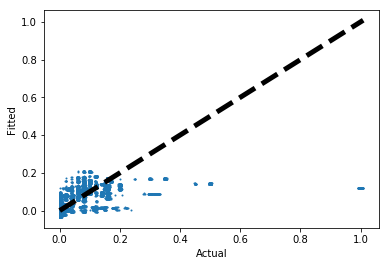

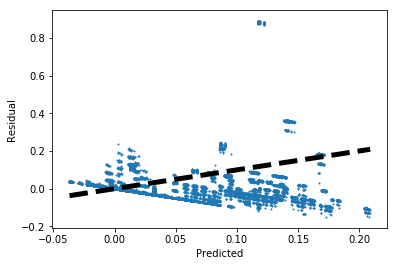

(True, True, True, True, False)
0.000139317627834
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883466576242
 Test RMSE : 0.0883767521244


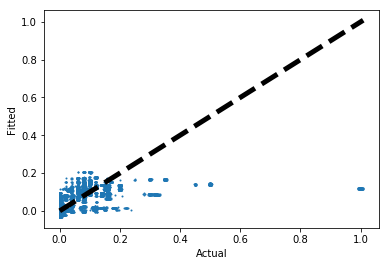

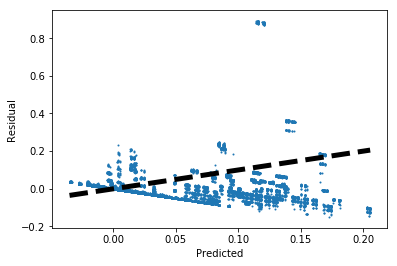

(True, True, True, True, True)
3.93515307333e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883359961947
 Test RMSE : 0.0883689500342


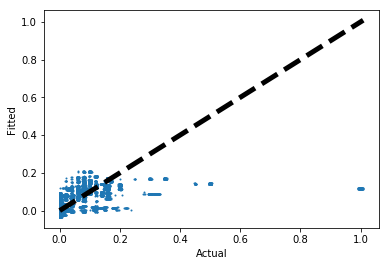

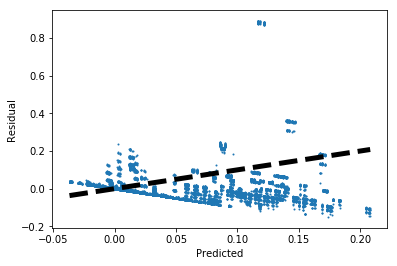

The minimum test RMSE obatined was for :
0.0883679995966
[1.0, 10.0, 1.0, 10.0, 10.0, 0.1, 10.0, 1.0, 0.1, 10.0, 10.0, 0.1, 0.1, 10.0, 0.1, 10.0, 10.0, 0.1, 10.0, 10.0, 10.0, 0.1, 10.0, 10.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 10.0, 2.2537169867800589e-05, 0.00013931762783438156, 5.2063785467425361e-05, 0.00013931762783438156, 2.2537169867800589e-05, 0.00013931762783438156, 2.4165868526121302e-05, 0.00013931762783438156, 1.5966159230375293e-05, 0.00013931762783438156, 2.4267142366438679e-05, 0.00013931762783438156, 5.6535702887373093e-06, 0.00013931762783438156, 2.2518392681393692e-05, 0.00022705302024045155, 0.00012027409710705748, 0.00022705302024045155, 0.00022537169867800589, 0.0002117504065961886, 0.00011216802550539921, 0.0002117504065961886, 0.00021018240047986485, 0.00013931762783438156, 2.4267142366438679e-05, 0.00013931762783438156, 6.0111564583390063e-05, 0.00013931762783438156, 1.9850769266618713e-05, 0.00013931762783438156, 3.935153073326064e-05]
[0.090791999599972417, 0.0

In [27]:
#lasso reg , continued for 31 remaining combinations

from sklearn.preprocessing import OneHotEncoder

rmse_test_com=[]
alphalist=[]
lasso_reg=linear_model.LassoCV(cv=10, random_state=27)

for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    lasso_reg.fit(xoh, y)
    #print "best alpha for comination "+str(i)+" is :"
    print lasso_reg.alpha_
    alphalist.append(lasso_reg.alpha_)
    lasso_reg_2 = linear_model.Lasso(alpha=lasso_reg.alpha_, random_state=27)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"

        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        lasso_reg_2.fit(X_train, y_train)
        y_test_predicted =lasso_reg_2 .predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=lasso_reg_2.predict(X_train)
        rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
        rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
    average_train_RMSE=sum(rmse_train)/10
    average_test_RMSE=sum(rmse_test)/10
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
    y_residual=y-y_predicted_fold
    plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_Lasso_'+str(count)+'.png')
    plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_Lasso_'+str(count)+'.png')
    count=count+1
print "The minimum test RMSE obatined was for :"
print min(rmse_test_com)


print alphalist
print rmse_train_com
print rmse_test_com

best alpha for comination is :
0.000793563202355
lambda1: 0.000396781601178
lambda2: 0.000198390800589
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834780067
 Test RMSE : 0.101899966681


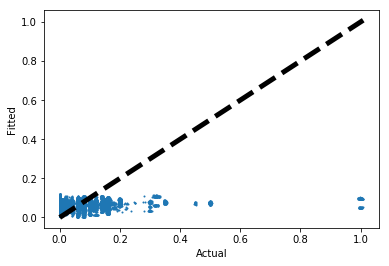

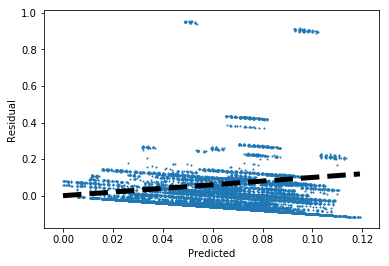

In [13]:
#Task 2 a v )applying ElasticNetRegularization for the very first combination
from sklearn import linear_model
en_reg=linear_model.ElasticNetCV(cv=10, random_state=27)
rmse_test_com=[]
rmse_train=[]
rmse_test=[]
y_predicted_fold=[]
lambda1list=[]
lambda2list=[]
ohenc_best = OneHotEncoder(categorical_features= (False, False, False, False, False))
ohenc_best.fit(X_SEnc)
xoh=ohenc_best.transform(X_SEnc)

en_reg.fit(xoh, y)
print "best alpha for comination is :"
print en_reg.alpha_
lambda1=en_reg.alpha_*en_reg.l1_ratio_
lambda2=0.5*en_reg.alpha_*(1 - en_reg.l1_ratio_)
print "lambda1: "+str(lambda1)
print "lambda2: "+str(lambda2)
lambda1list.append(lambda1)
lambda2list.append(lambda2)
#en_reg.cv_values_
#best alpha for en=0.1
en_reg_2 = linear_model.ElasticNet(alpha=en_reg.alpha_, random_state=27)
for train_index, test_index in kf.split(xoh):
    print "kf fold starts"

    X_train, y_train = xoh[train_index], y[train_index]
    X_test, y_test = xoh[test_index], y[test_index]
    en_reg_2.fit(X_train, y_train)
    y_test_predicted = en_reg_2.predict(X_test)
    y_predicted_fold.append(y_test_predicted)
    y_train_predicted=en_reg_2.predict(X_train)
    rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
    rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
average_train_RMSE=sum(rmse_train)/10
average_test_RMSE=sum(rmse_test)/10
print " Train RMSE : "+ str(average_train_RMSE)
print " Test RMSE : "+ str(average_test_RMSE)
y_predicted_fold=np.concatenate(y_predicted_fold,axis=0)
y_residual=y-y_predicted_fold
plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_ENet_1.png')
plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_ENet_1.png')

(False, False, False, False, True)
best alpha for comination (False, False, False, False, True) is :
4.50743397356e-05
lambda1: 2.25371698678e-05
lambda2: 1.12685849339e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907940197878
 Test RMSE : 0.0908300111497


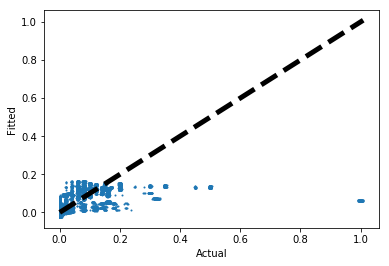

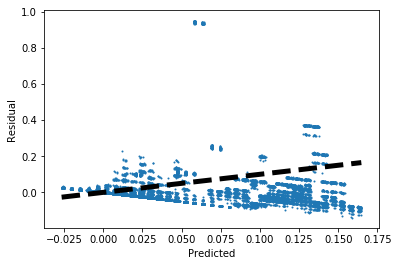

(False, False, False, True, False)
best alpha for comination (False, False, False, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907959094786
 Test RMSE : 0.0908277718737


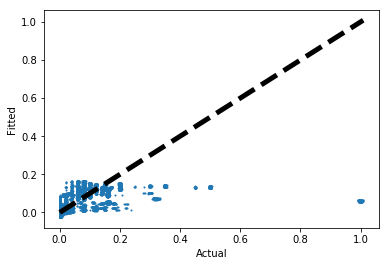

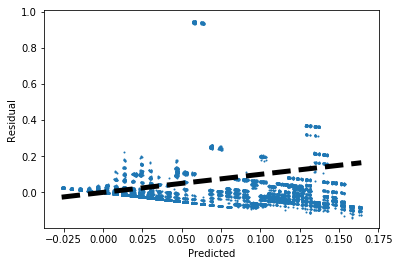

(False, False, False, True, True)
best alpha for comination (False, False, False, True, True) is :
0.000104127570935
lambda1: 5.20637854674e-05
lambda2: 2.60318927337e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0907934694091
 Test RMSE : 0.0908259106157


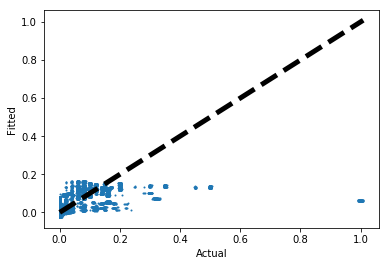

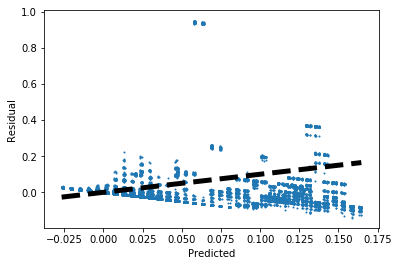

(False, False, True, False, False)
best alpha for comination (False, False, True, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100588874809
 Test RMSE : 0.100672237904


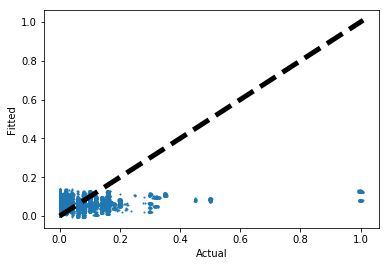

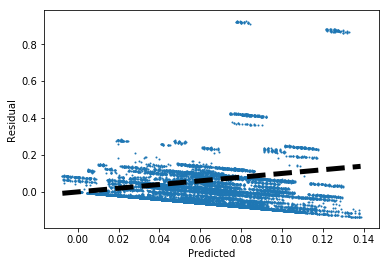

(False, False, True, False, True)
best alpha for comination (False, False, True, False, True) is :
4.50743397356e-05
lambda1: 2.25371698678e-05
lambda2: 1.12685849339e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893846749724
 Test RMSE : 0.0894408194709


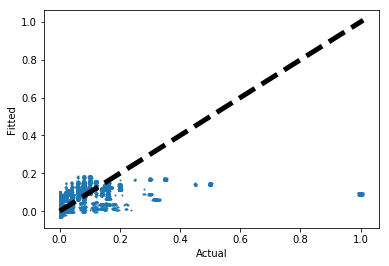

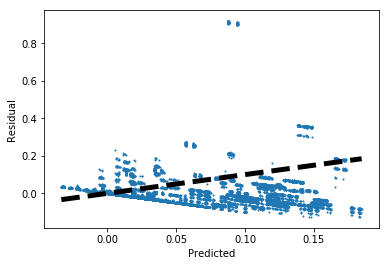

(False, False, True, True, False)
best alpha for comination (False, False, True, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893904221952
 Test RMSE : 0.0894418970722


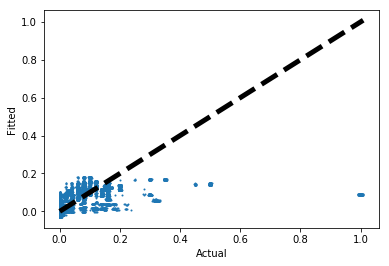

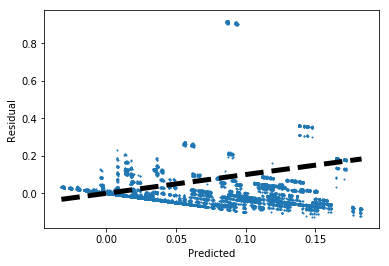

(False, False, True, True, True)
best alpha for comination (False, False, True, True, True) is :
5.18245374239e-05
lambda1: 2.5912268712e-05
lambda2: 1.2956134356e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893834014214
 Test RMSE : 0.0894366914421


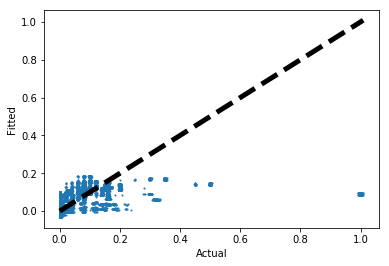

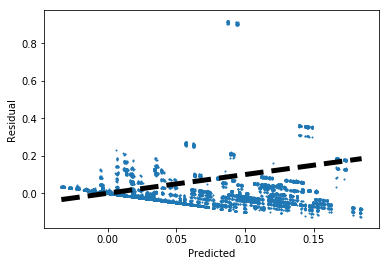

(False, True, False, False, False)
best alpha for comination (False, True, False, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100892024196
 Test RMSE : 0.100940552465


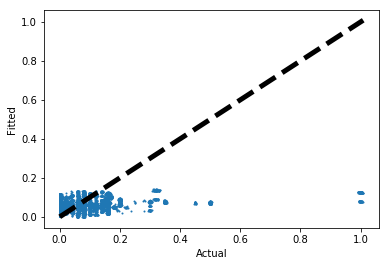

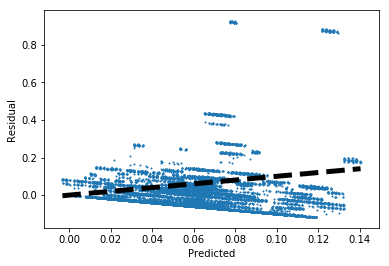

(False, True, False, False, True)
best alpha for comination (False, True, False, False, True) is :
3.19323184608e-05
lambda1: 1.59661592304e-05
lambda2: 7.98307961519e-06
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897529586157
 Test RMSE : 0.0897687854902


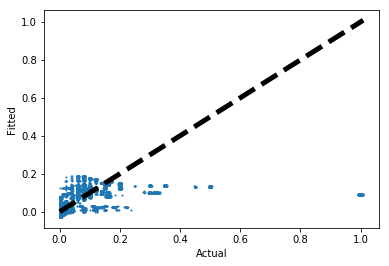

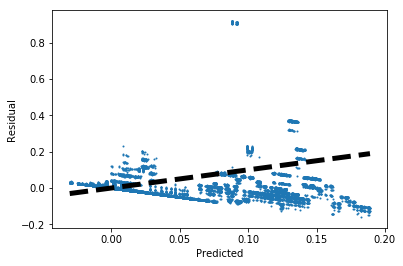

(False, True, False, True, False)
best alpha for comination (False, True, False, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897601759311
 Test RMSE : 0.0897723140646


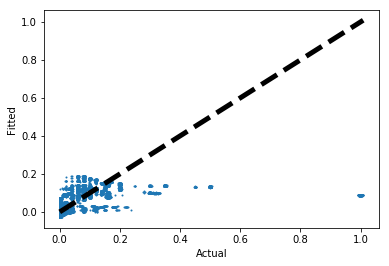

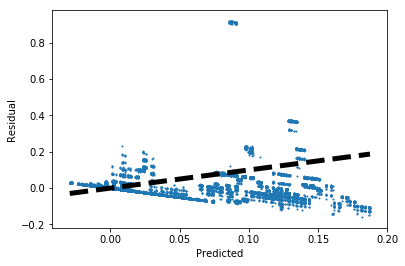

(False, True, False, True, True)
best alpha for comination (False, True, False, True, True) is :
5.20417226628e-05
lambda1: 2.60208613314e-05
lambda2: 1.30104306657e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897527866522
 Test RMSE : 0.0897659388577


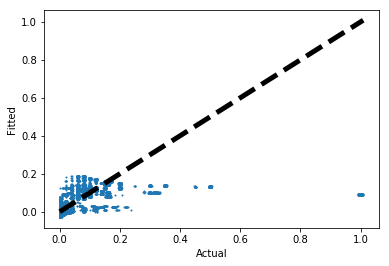

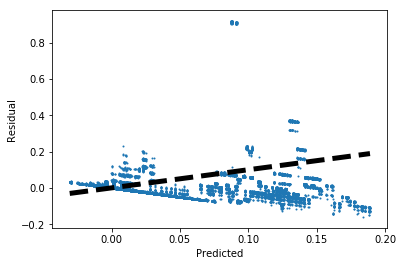

(False, True, True, False, False)
best alpha for comination (False, True, True, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996432394678
 Test RMSE : 0.0997081780842


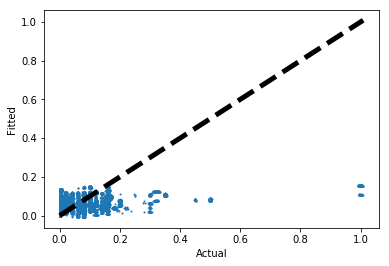

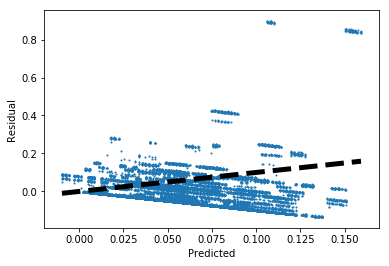

(False, True, True, False, True)
best alpha for comination (False, True, True, False, True) is :
1.13071405775e-05
lambda1: 5.65357028874e-06
lambda2: 2.82678514437e-06
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883346621603
 Test RMSE : 0.0883693085424


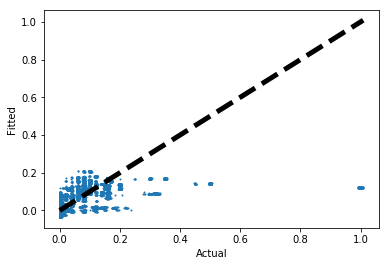

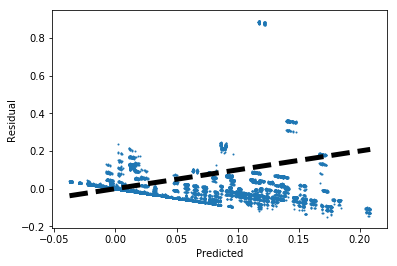

(False, True, True, True, False)
best alpha for comination (False, True, True, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883471221854
 Test RMSE : 0.0883777963658


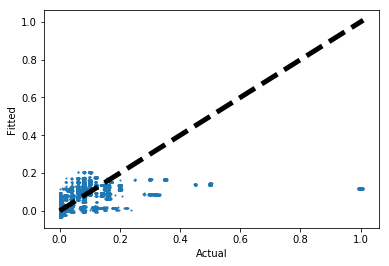

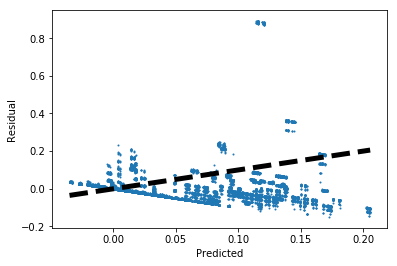

(False, True, True, True, True)
best alpha for comination (False, True, True, True, True) is :
4.82914687292e-05
lambda1: 2.41457343646e-05
lambda2: 1.20728671823e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883355903394
 Test RMSE : 0.0883679976476


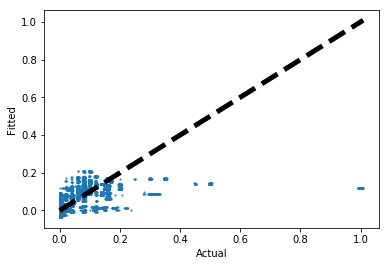

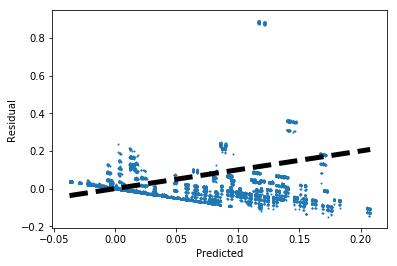

(True, False, False, False, False)
best alpha for comination (True, False, False, False, False) is :
0.000454106040481
lambda1: 0.00022705302024
lambda2: 0.00011352651012
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.101834409202
 Test RMSE : 0.10189627046


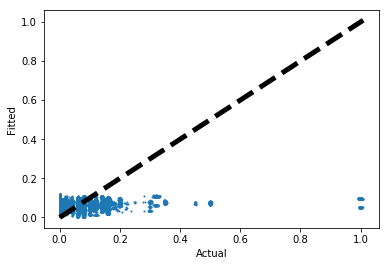

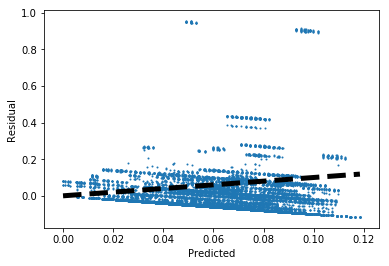

(True, False, False, False, True)
best alpha for comination (True, False, False, False, True) is :
0.000209216551999
lambda1: 0.000104608276
lambda2: 5.23041379998e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0908326843416
 Test RMSE : 0.0909312021301


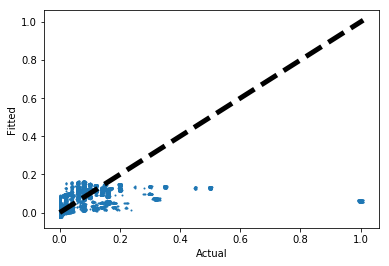

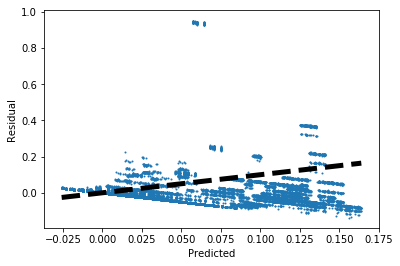

(True, False, False, True, False)
best alpha for comination (True, False, False, True, False) is :
0.000454106040481
lambda1: 0.00022705302024
lambda2: 0.00011352651012
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0908007777975
 Test RMSE : 0.0908271671181


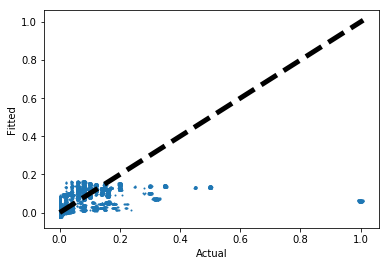

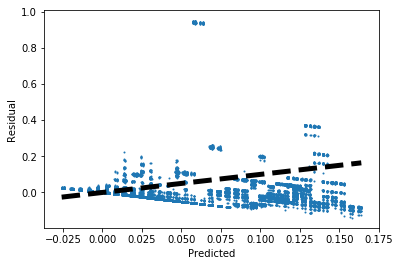

(True, False, False, True, True)
best alpha for comination (True, False, False, True, True) is :
0.000450743397356
lambda1: 0.000225371698678
lambda2: 0.000112685849339
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.090799736361
 Test RMSE : 0.0908260597451


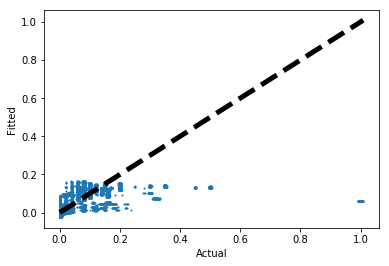

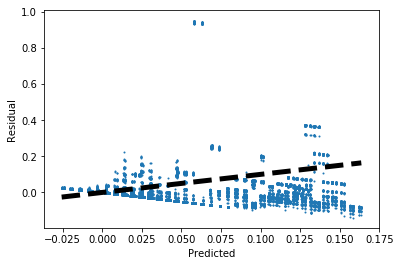

(True, False, True, False, False)
best alpha for comination (True, False, True, False, False) is :
0.000423500813192
lambda1: 0.000211750406596
lambda2: 0.000105875203298
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100593901449
 Test RMSE : 0.100672635994


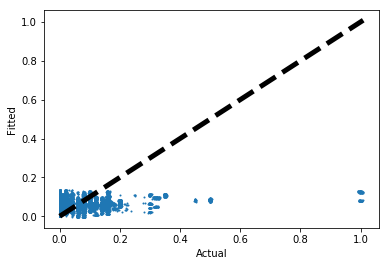

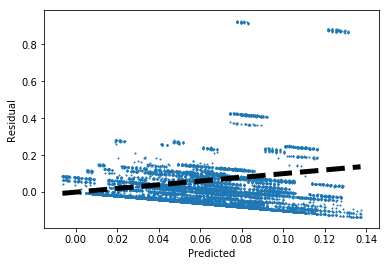

(True, False, True, False, True)
best alpha for comination (True, False, True, False, True) is :
0.000195116056618
lambda1: 9.75580283089e-05
lambda2: 4.87790141545e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0894197750774
 Test RMSE : 0.0895416327459


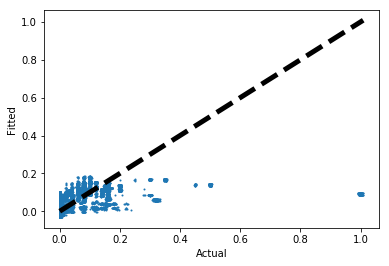

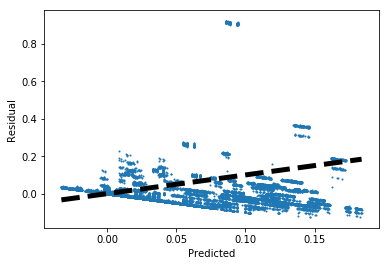

(True, False, True, True, False)
best alpha for comination (True, False, True, True, False) is :
0.000423500813192
lambda1: 0.000211750406596
lambda2: 0.000105875203298
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.089399446929
 Test RMSE : 0.0894460185096


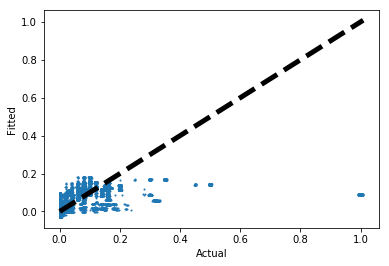

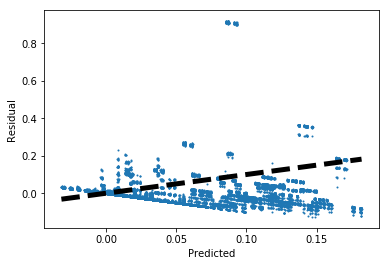

(True, False, True, True, True)
best alpha for comination (True, False, True, True, True) is :
0.00042036480096
lambda1: 0.00021018240048
lambda2: 0.00010509120024
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0893983752166
 Test RMSE : 0.0894450925982


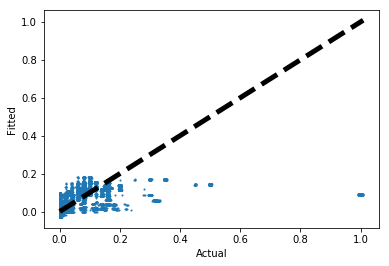

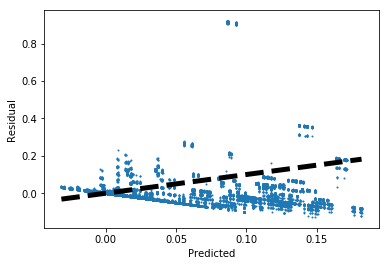

(True, True, False, False, False)
best alpha for comination (True, True, False, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.100892081138
 Test RMSE : 0.100939677744


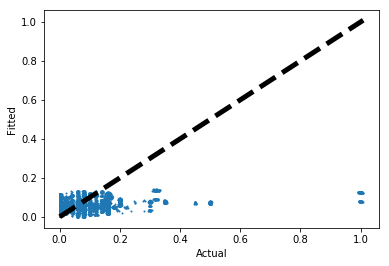

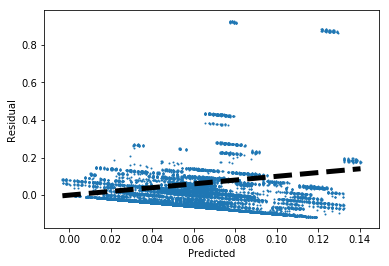

(True, True, False, False, True)
best alpha for comination (True, True, False, False, True) is :
4.22126457392e-05
lambda1: 2.11063228696e-05
lambda2: 1.05531614348e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0897528541106
 Test RMSE : 0.0897728220668


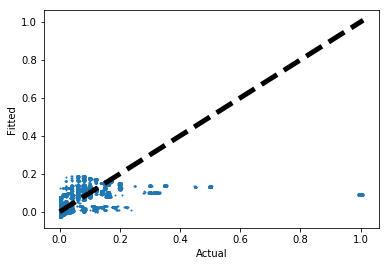

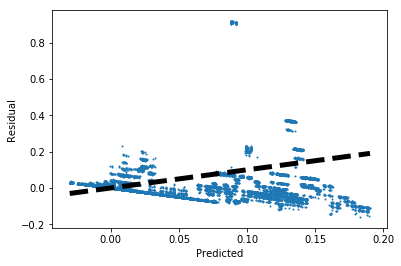

(True, True, False, True, False)
best alpha for comination (True, True, False, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.089760220259
 Test RMSE : 0.0897715622558


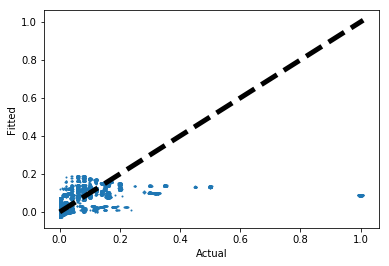

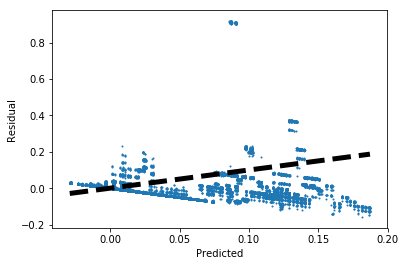

(True, True, False, True, True)
best alpha for comination (True, True, False, True, True) is :
0.000120223129167
lambda1: 6.01115645834e-05
lambda2: 3.00557822917e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.08975424097
 Test RMSE : 0.0897665080223


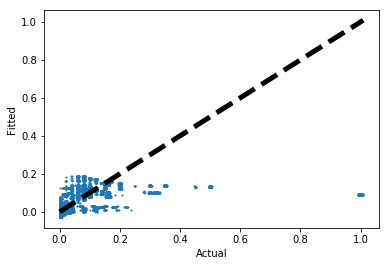

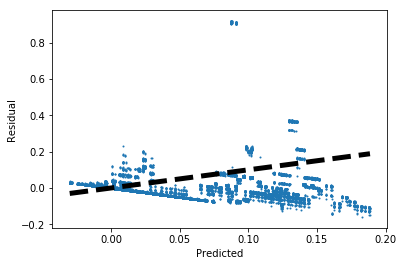

(True, True, True, False, False)
best alpha for comination (True, True, True, False, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0996432915234
 Test RMSE : 0.0997073665082


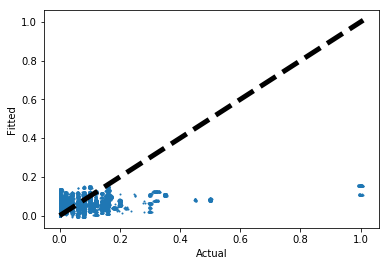

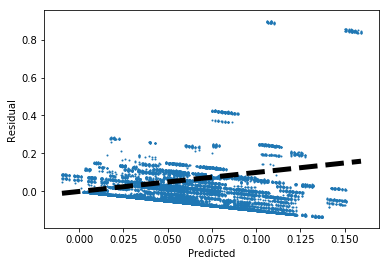

(True, True, True, False, True)
best alpha for comination (True, True, True, False, True) is :
3.70257877125e-05
lambda1: 1.85128938563e-05
lambda2: 9.25644692813e-06
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.088335197407
 Test RMSE : 0.0883740668126


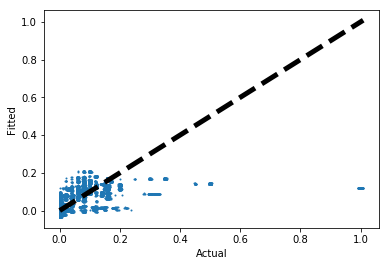

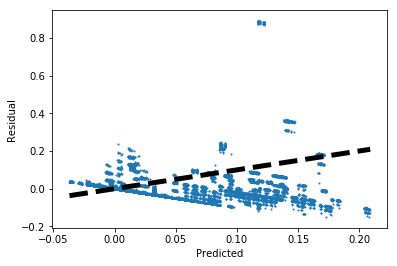

(True, True, True, True, False)
best alpha for comination (True, True, True, True, False) is :
0.000278635255669
lambda1: 0.000139317627834
lambda2: 6.96588139172e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883471617495
 Test RMSE : 0.0883771093751


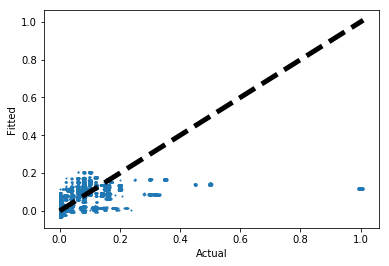

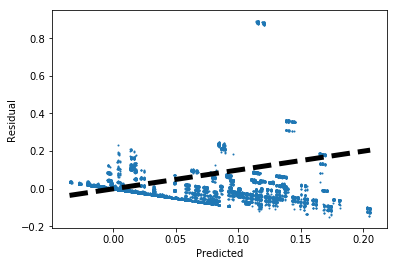

(True, True, True, True, True)
best alpha for comination (True, True, True, True, True) is :
8.43907130824e-05
lambda1: 4.21953565412e-05
lambda2: 2.10976782706e-05
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
kf fold starts
 Train RMSE : 0.0883362873153
 Test RMSE : 0.0883689180587


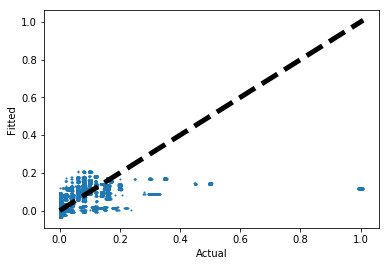

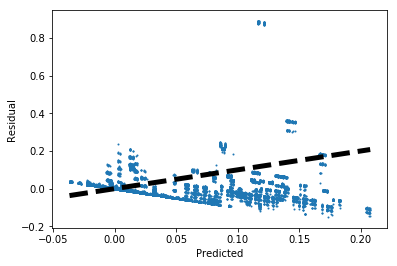

The minimum test RMSE obatined was for :
0.0883679976476
[2.2537169867800593e-05, 0.00013931762783438159, 5.2063785467425422e-05, 0.00013931762783438159, 2.2537169867800593e-05, 0.00013931762783438159, 2.5912268711970794e-05, 0.00013931762783438159, 1.5966159230375293e-05, 0.00013931762783438159, 2.6020861331390226e-05, 0.00013931762783438159, 5.6535702887373102e-06, 0.00013931762783438159, 2.414573436461561e-05, 0.00022705302024045158, 0.00010460827599961769, 0.00022705302024045158, 0.00022537169867800592, 0.00021175040659618863, 9.755802830892697e-05, 0.00021175040659618863, 0.00021018240047986487, 0.00013931762783438159, 2.11063228695938e-05, 0.00013931762783438159, 6.0111564583390009e-05, 0.00013931762783438159, 1.8512893856255138e-05, 0.00013931762783438159, 4.2195356541207242e-05]
[1.1268584933900296e-05, 6.9658813917190796e-05, 2.6031892733712711e-05, 6.9658813917190796e-05, 1.1268584933900296e-05, 6.9658813917190796e-05, 1.2956134355985397e-05, 6.9658813917190796e-05, 7.9830796

In [33]:
#en reg , continued for 31 remaining combinations

from sklearn.preprocessing import OneHotEncoder

rmse_test_com=[]
lambda1list=[]
lambda2list=[]
en_reg=linear_model.ElasticNetCV(cv=10, random_state=27)
en_reg.fit(xoh, y)
en_reg.alpha_
for i in l[1:]:
    print i
    rmse_train=[]
    rmse_test=[]
    y_predicted_fold=[]
    ohenc = OneHotEncoder(categorical_features=i)
    ohenc.fit(X_SEnc)
    xoh=ohenc.transform(X_SEnc)
    en_reg.fit(xoh, y)
    print "best alpha for comination "+str(i)+" is :"
    print en_reg.alpha_
    lambda1=en_reg.alpha_*en_reg.l1_ratio_
    lambda2=0.5*en_reg.alpha_*(1 - en_reg.l1_ratio_)
    print "lambda1: "+str(lambda1)
    print "lambda2: "+str(lambda2)
    lambda1list.append(lambda1)
    lambda2list.append(lambda2)
    en_reg_2 = linear_model.ElasticNet(alpha=en_reg.alpha_, random_state=27)
    for train_index, test_index in kf.split(xoh):
        print "kf fold starts"
        X_train, y_train = xoh.toarray()[train_index], y[train_index]
        X_test, y_test = xoh.toarray()[test_index], y[test_index]
        en_reg_2.fit(X_train, y_train)
        y_test_predicted =en_reg_2 .predict(X_test)
        y_predicted_fold.append(y_test_predicted)
        y_train_predicted=en_reg_2.predict(X_train)
        rmse_test.append(np.sqrt(np.mean((y_test - y_test_predicted) ** 2)))
        rmse_train.append(np.sqrt(np.mean((y_train - y_train_predicted) ** 2)))
    average_train_RMSE=sum(rmse_train)/10
    average_test_RMSE=sum(rmse_test)/10
    print " Train RMSE : "+ str(average_train_RMSE)
    print " Test RMSE : "+ str(average_test_RMSE)
    rmse_test_com.append(average_test_RMSE)
    y_predicted_fold=np.concatenate(y_predicted_fold).ravel()
    y_residual=y-y_predicted_fold
    plot_val(y,y_predicted_fold,'Actual','Fitted','2av_ActualvsFitted_ENet_'+str(count)+'.png')
    plot_val(y_predicted_fold,y_residual,'Predicted','Residual','2av_PredictedvsResidual_ENet_'+str(count)+'.png')
    count=count+1
print "The minimum test RMSE obatined was for :"
print min(rmse_test_com)

print lambda1list
print lambda2list
print rmse_train_com
print rmse_test_com